<a href="https://colab.research.google.com/github/awarbler/CSE450AWF23/blob/main/M03T01Master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Dictionary for the Housing dataset




id - Unique ID for each home sold<br>
date - Date of the home sale<br>
price - Price of each home sold<br>
bedrooms - Number of bedrooms<br>
bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower<br>
sqft_living - Square footage of the apartments interior living space<br>
sqft_lot - Square footage of the land space<br>
floors - Number of floors<br>
waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not<br>
view - An index from 0 to 4 of how good the view of the property was<br>
condition - An index from 1 to 5 on the condition of the apartment,<br>
grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.<br>
sqft_above - The square footage of the interior housing space that is above ground level<br>
sqft_basement - The square footage of the interior housing space that is below ground level<br>
yr_built - The year the house was initially built<br>
yr_renovated - The year of the house’s last renovation<br>
zipcode - What zipcode area the house was listed in<br>
lat - Latitude<br>
long - Longitude<br>
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors<br>
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors<br>

# Data Files



dataset = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

holdout = pd.read_csv(' https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test.csv')

mini = pd.read.csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test_mini.csv')

#Goals

What kind of machine-learning problem do you think we're looking at here?

Based on your initial analysis of the data, your team feels you can best show confidence in your model by using:

The sum of squares error (SSE).

The mean squared error (MSE).

The root mean squared error (RMSE).

The �2R2 value.



Whatever method we come up with to predict housing prices, will we attach some kind of empirical confidence metric?



Based on your initial analysis of the data, your team feels:

We can lower the predicted price for specific neighborhoods before training the model.

We can add average income or other demographic information for the area as features.

For specific zip codes we could add a step to our pipeline that reduces the predicted price by a specific percentage prior to outputting the final price result to ensure the properties aren’t being overvalued.

Taking this kind of action would be a violation of federal laws and/or ethics.



The head of data science says we should use gradient-boosted trees for this analysis. For example, how should we handle square footage?



Optional :  

Is there a way we can easily identify properties in low-income areas and have the model lower those estimates to protect our insurance customers' interests?

# STEP 1: IMPORTING LIBRARIES

# Load libraries

In [ ]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error , r2_score,confusion_matrix, classification_report, accuracy_score,accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from typing_extensions import dataclass_transform
from scipy.stats import randint
from IPython.display import Image
from sklearn.datasets import load_wine


from math import sqrt

import seaborn as sns #for plotting graphs
import os
os.environ["COLUMNS"] = "74" # output width, in characters
pd.set_option("display.width", 74)

#Load Dataset

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

Prune Decision Tree


# STEP 2: DATA CLEANING AND PREPROCESSING
Look at data

In [ ]:
dataset.unique()

AttributeError: ignored

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20000 non-null  int64  
 1   date           20000 non-null  object 
 2   bedrooms       20000 non-null  int64  
 3   bathrooms      20000 non-null  float64
 4   sqft_living    20000 non-null  int64  
 5   sqft_lot       20000 non-null  int64  
 6   floors         20000 non-null  float64
 7   waterfront     20000 non-null  int64  
 8   view           20000 non-null  int64  
 9   condition      20000 non-null  int64  
 10  grade          20000 non-null  int64  
 11  sqft_above     20000 non-null  int64  
 12  sqft_basement  20000 non-null  int64  
 13  yr_built       20000 non-null  int64  
 14  yr_renovated   20000 non-null  int64  
 15  zipcode        20000 non-null  int64  
 16  lat            20000 non-null  float64
 17  long           20000 non-null  float64
 18  sqft_l

In [ ]:
dataset.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1565930130,20141104T000000,4,3.25,3760,4675,2.0,0,0,3,...,2740,1020,2007,0,98038,47.3862,-122.048,3280,4033,429900.0
1,3279000420,20150115T000000,3,1.75,1460,7800,1.0,0,0,2,...,1040,420,1979,0,98023,47.3035,-122.382,1310,7865,233000.0
2,194000575,20141014T000000,4,1.00,1340,5800,1.5,0,2,3,...,1340,0,1914,0,98116,47.5658,-122.389,1900,5800,455000.0
3,2115510160,20141208T000000,3,1.75,1440,8050,1.0,0,0,3,...,1440,0,1985,0,98023,47.3187,-122.390,1790,7488,258950.0
4,7522500005,20140815T000000,2,1.50,1780,4750,1.0,0,0,4,...,1080,700,1947,0,98117,47.6859,-122.395,1690,5962,555000.0


In [ ]:
dataset.shape

(20000, 21)

In [ ]:
dataset.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.000000e+04,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,2.000000e+04
mean,4.580297e+09,3.370200,2.115750,2079.883100,1.501533e+04,1.49645,0.007550,0.234900,3.409700,7.657700,1790.232900,289.650200,1971.100150,82.732150,98077.876850,47.559970,-122.213897,1986.387500,12748.96040,5.394367e+05
std,2.875295e+09,0.931931,0.770134,919.433672,3.970135e+04,0.54095,0.086564,0.767692,0.651895,1.175287,829.587101,441.537072,29.374008,397.872344,53.438026,0.138517,0.140649,685.211515,27076.48904,3.664334e+05
min,1.000102e+06,0.000000,0.000000,290.000000,5.200000e+02,1.00000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.00000,7.500000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.00000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.750000,0.000000,98033.000000,47.470675,-122.328000,1490.000000,5100.00000,3.220000e+05
50%,3.904955e+09,3.000000,2.250000,1910.000000,7.620000e+03,1.50000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571450,-122.230000,1840.000000,7622.00000,4.500000e+05
75%,7.309825e+09,4.000000,2.500000,2550.000000,1.071000e+04,2.00000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678000,-122.124000,2360.000000,10088.25000,6.416250e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.164794e+06,3.50000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.00000,7.700000e+06


In [ ]:
# no duplicates
# no empty columns
# Nan
dataset.isnull().sum()

NameError: ignored

In [ ]:
# https://medium.com/shecodeafrica/predicting-house-prices-gradientboostingregressor-algorithm-ec9d381b0ebc
corr_matrix = dataset.corr()
top_correlated_features = corr_matrix.index
corr_matrix["price"].sort_values(ascending = False)

<ipython-input-3-d4b519259290>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


price            1.000000
sqft_living      0.703920
grade            0.666447
sqft_above       0.607082
sqft_living15    0.585374
bathrooms        0.527989
view             0.395961
sqft_basement    0.325183
lat              0.307516
bedrooms         0.307281
waterfront       0.260133
floors           0.254428
yr_renovated     0.121534
sqft_lot         0.090317
sqft_lot15       0.082413
yr_built         0.054187
condition        0.035146
long             0.023976
id              -0.016081
zipcode         -0.055857
Name: price, dtype: float64

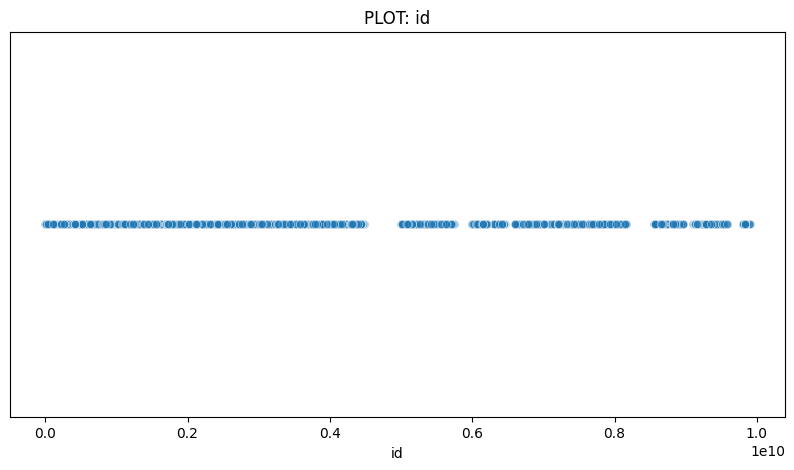

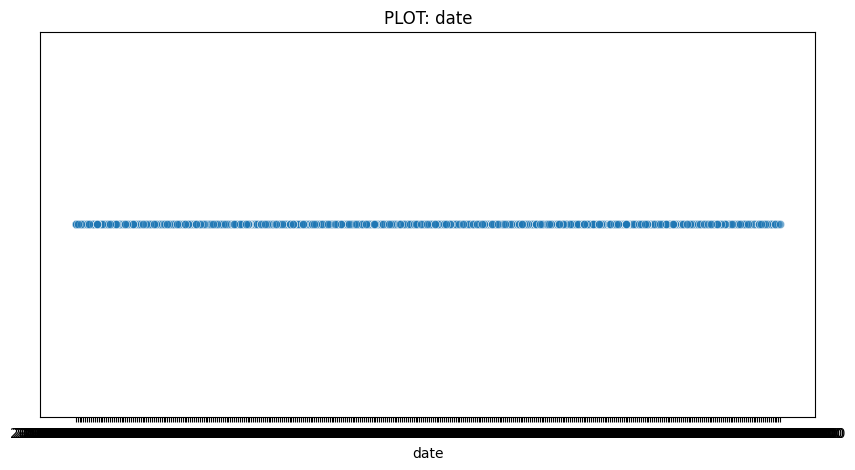

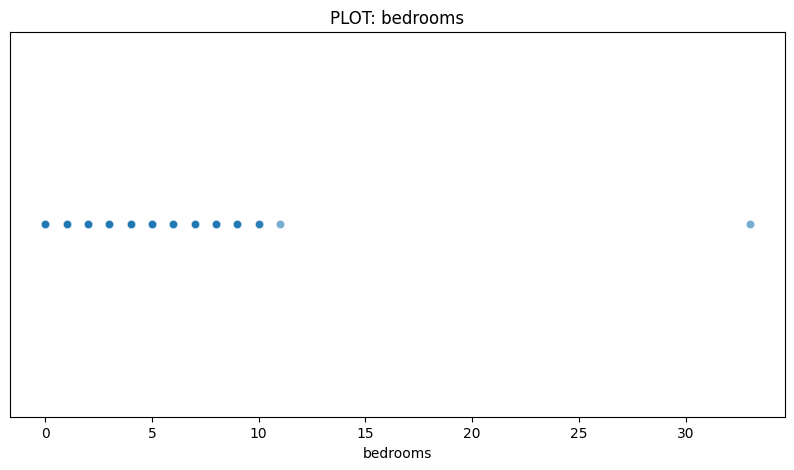

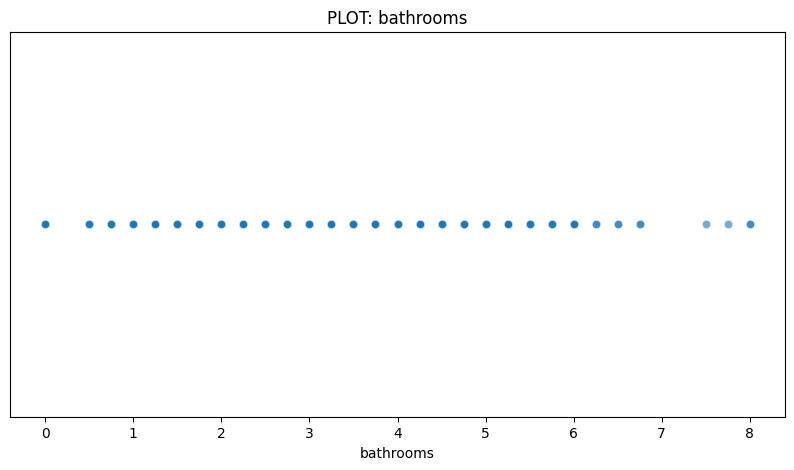

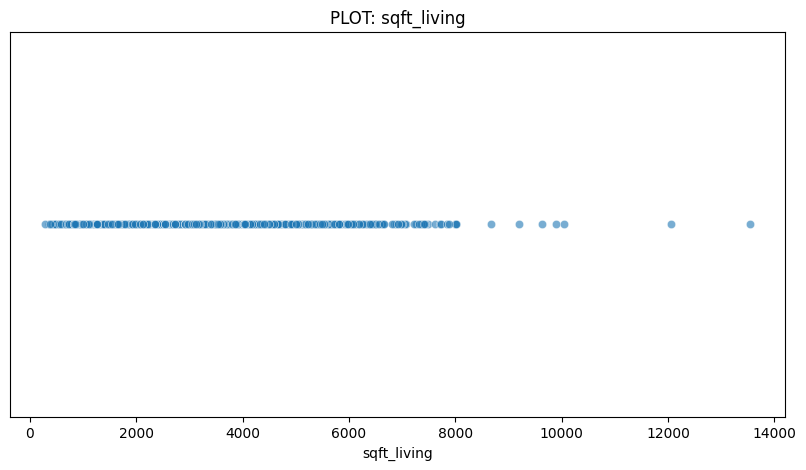

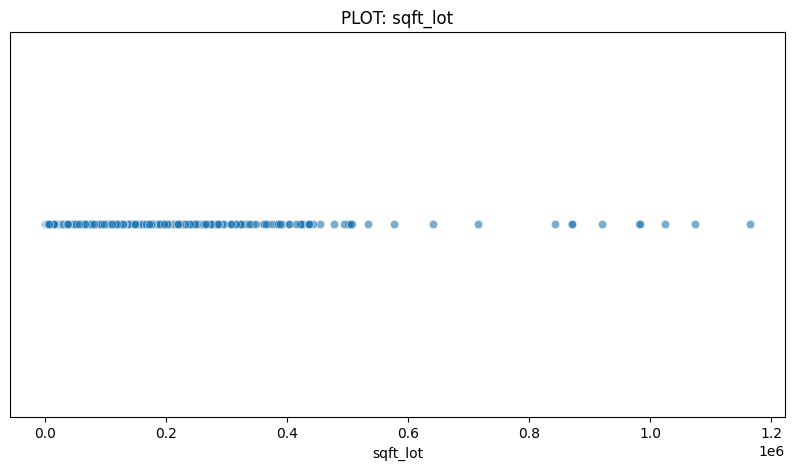

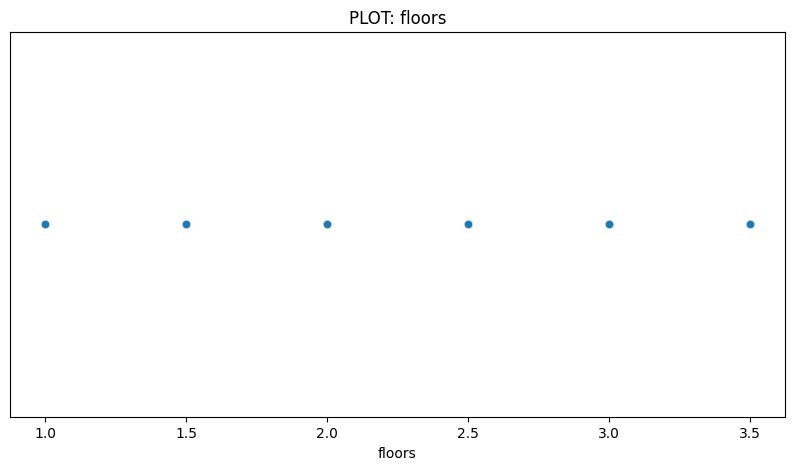

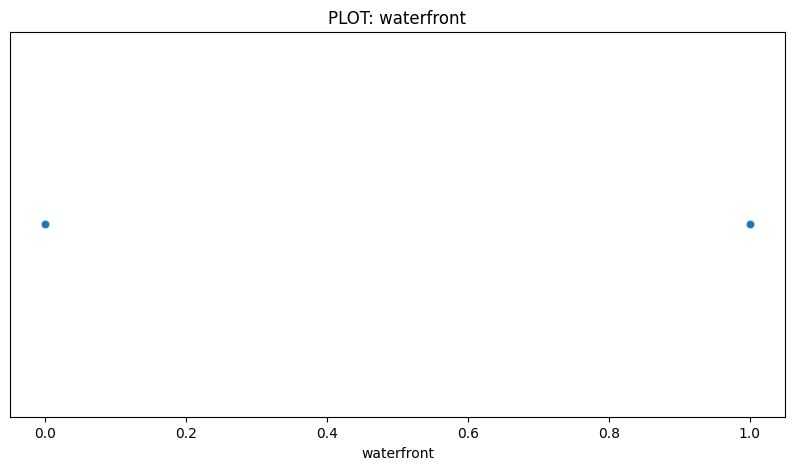

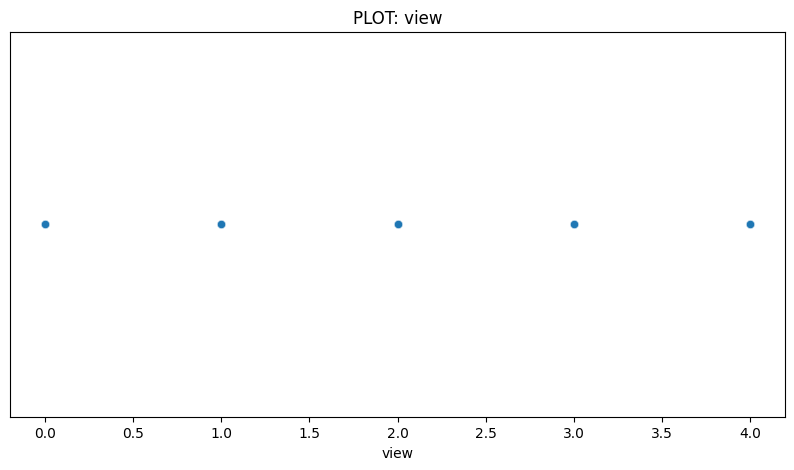

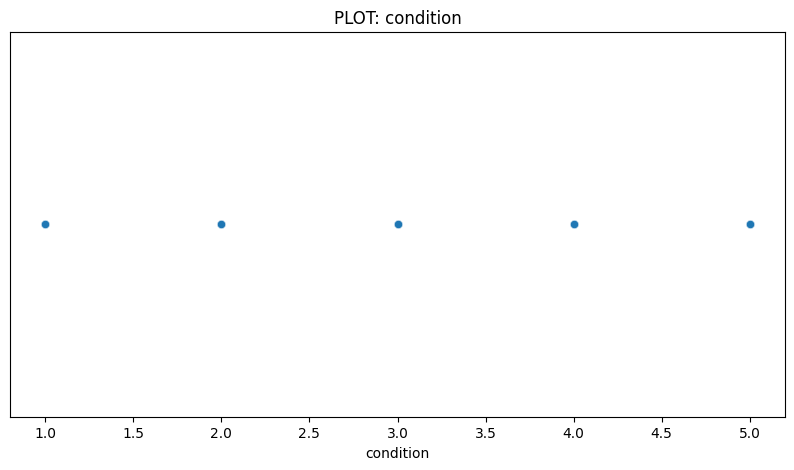

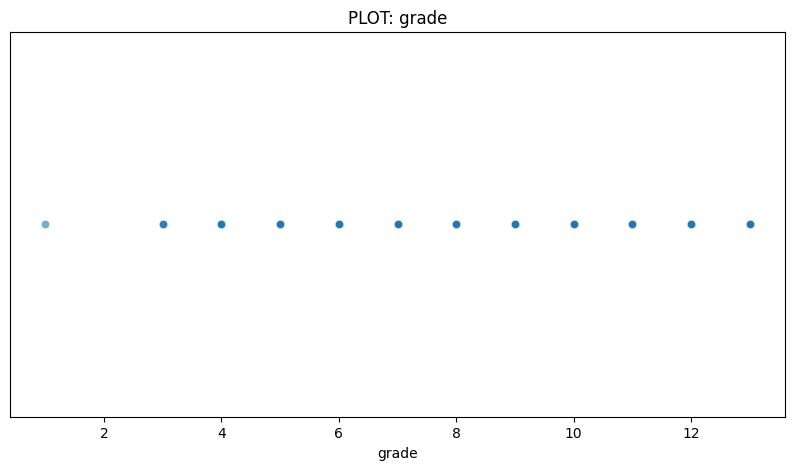

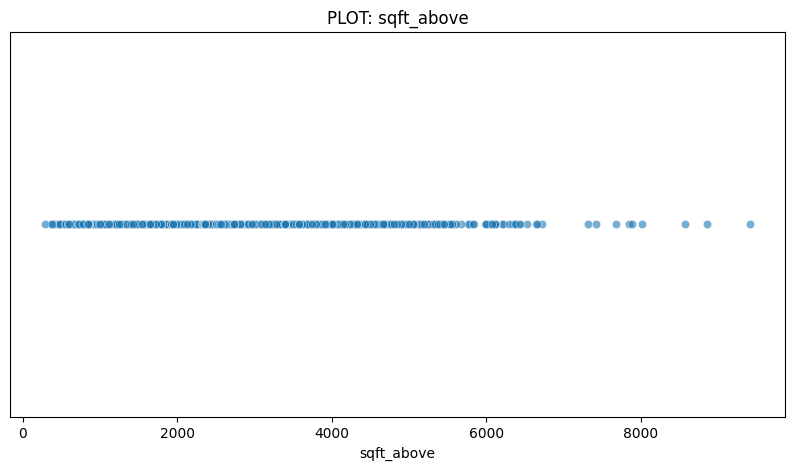

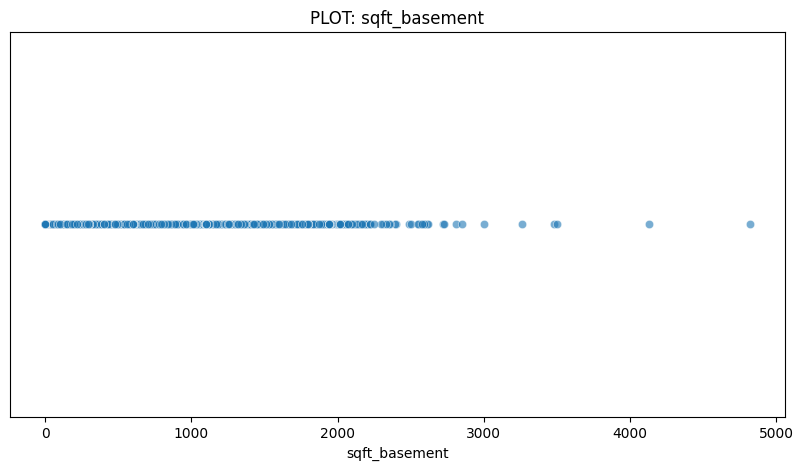

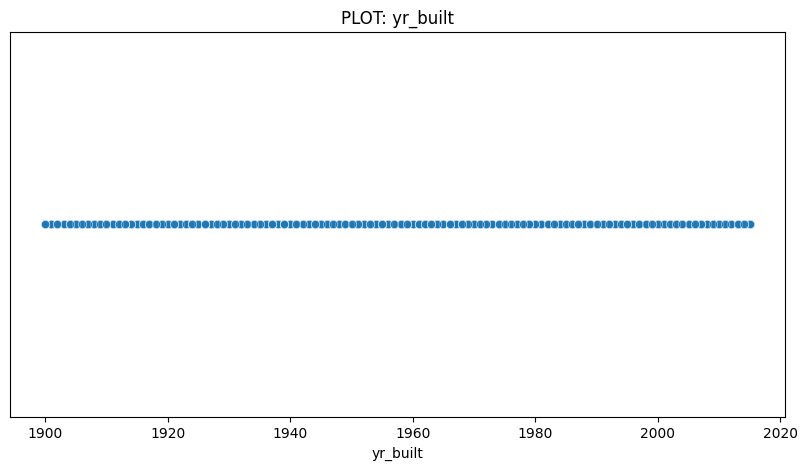

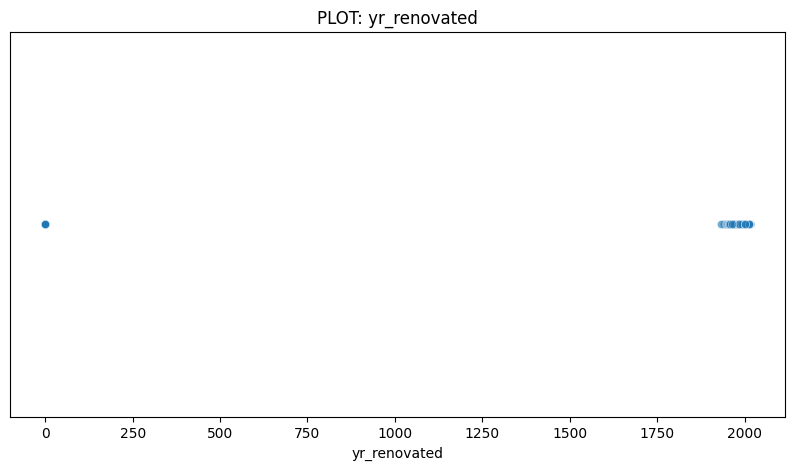

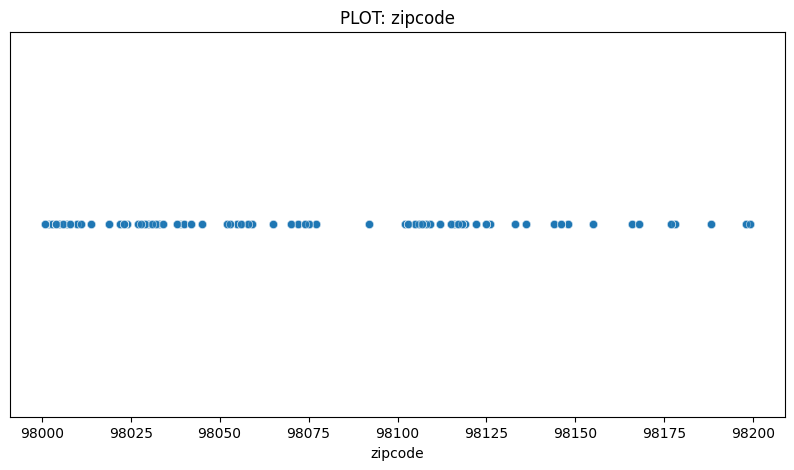

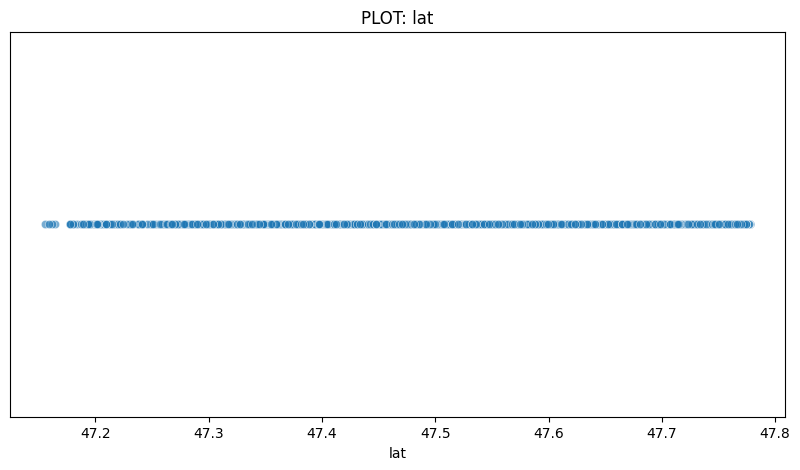

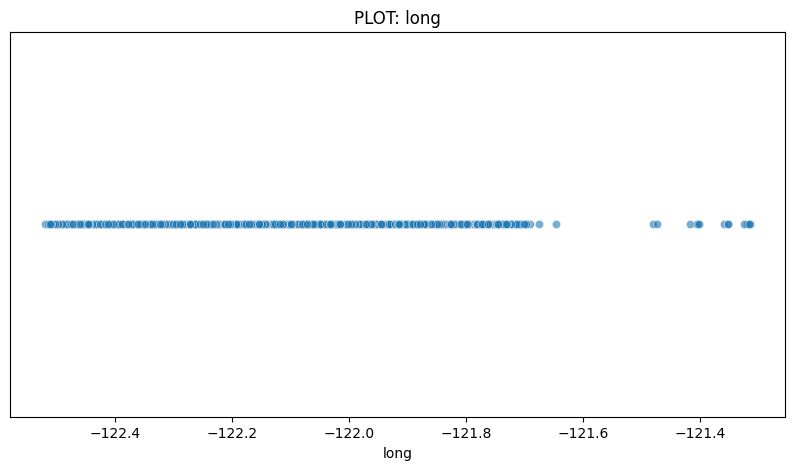

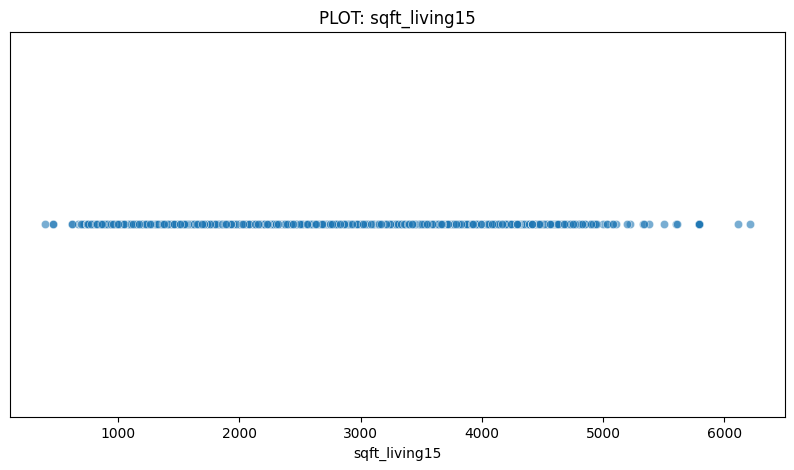

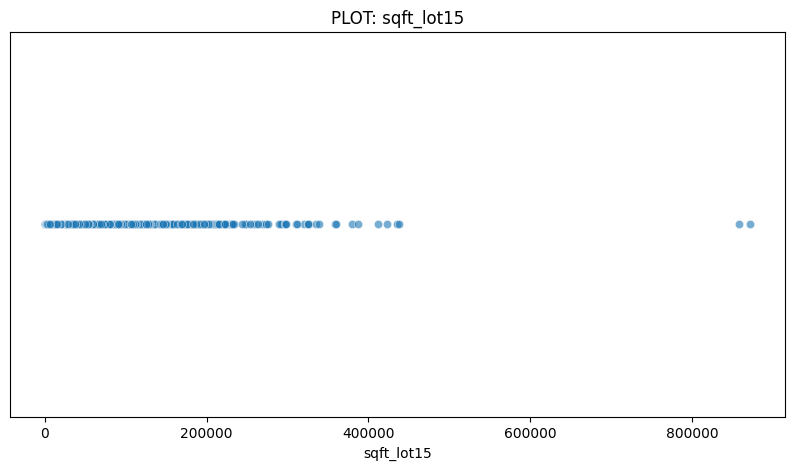

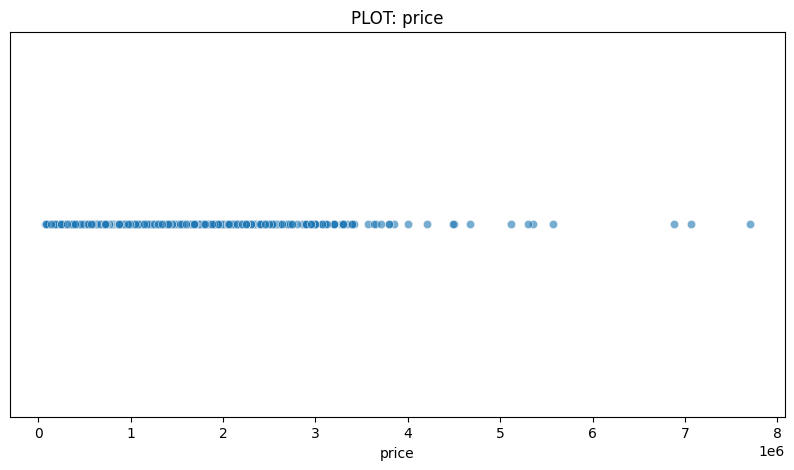

In [ ]:
# Finding outliers
import pandas as pd
import matplotlib.pyplot as plt

housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

columns = housing.columns.tolist()
for column in columns:
  plt.figure(figsize=(10, 5))  # Set figure size
  plt.scatter(housing[column], [0] * len(housing), alpha=0.6, edgecolors="w", linewidth=0.5)  # Scatter plot
  plt.xlabel(column)
  plt.title(f'PLOT: {column}')
  plt.yticks([])  # Disable the y-axis
  plt.show()
  print()

In [ ]:
dataset['bedrooms'].value_counts()


3     9101
4     6354
2     2567
5     1478
6      251
1      179
7       36
8       12
0       11
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [ ]:
print(dataset['sqft_living'].value_counts())


NameError: ignored

In [ ]:
dataset['grade'].value_counts()

7     8329
8     5597
9     2427
6     1880
10    1055
11     366
5      218
12      84
4       28
13      12
3        3
1        1
Name: grade, dtype: int64

In [ ]:
dataset['sqft_above'].value_counts()

1300    194
1010    189
1200    186
1220    176
1340    167
       ... 
5040      1
1414      1
8860      1
4450      1
380       1
Name: sqft_above, Length: 908, dtype: int64

In [ ]:
# Finding the count of waterfront.
dataset['waterfront'].value_counts()
# we can delete we dont need

0    19849
1      151
Name: waterfront, dtype: int64

In [ ]:
dataset['condition'].value_counts()


3    12980
4     5247
5     1583
2      161
1       29
Name: condition, dtype: int64

In [ ]:
# how to deal with outliers

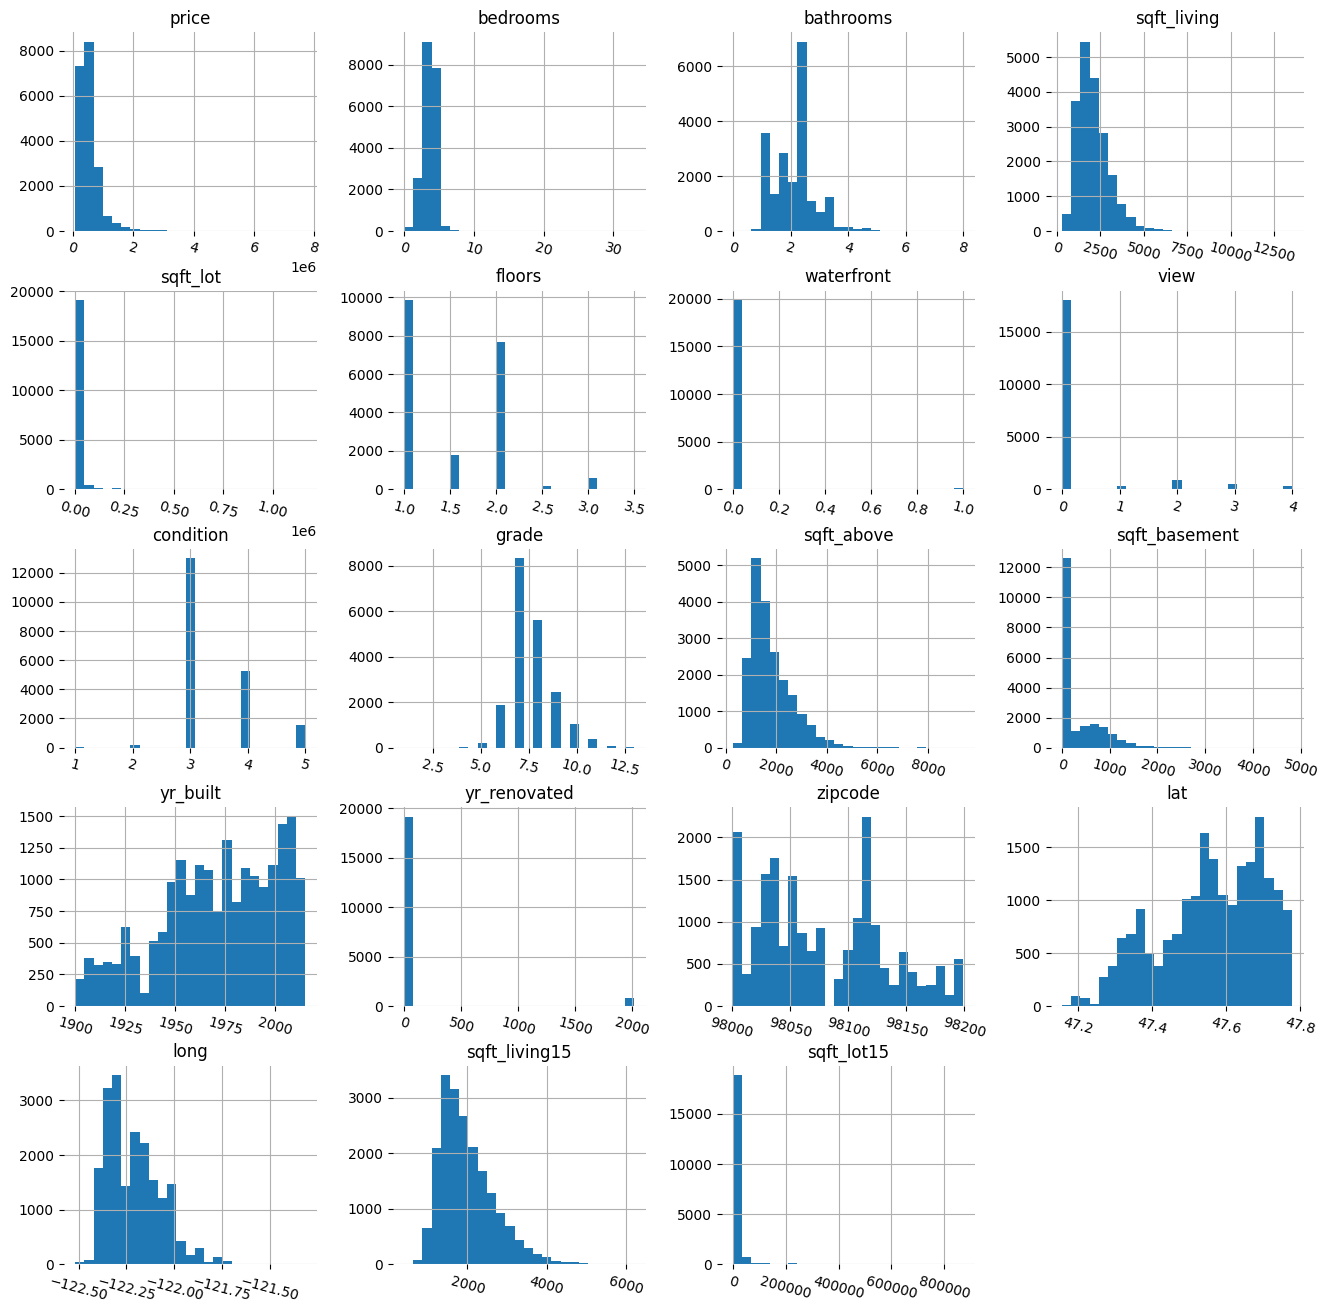

In [ ]:
# https://www.kaggle.com/code/awarbler/predicting-house-prices/edit
df1=dataset[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
    'lat', 'long', 'sqft_living15', 'sqft_lot15']]
h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

# STEP 3 : FINDING CORRELATION

# STEP 4 : EDA or DATA VISUALIZATION

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

7700000.0


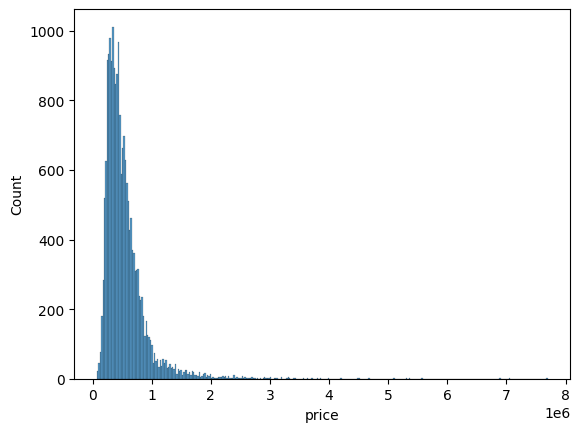

In [ ]:
#histogram displaying prices it looks to be right scewed
sns.histplot(housing['price'])
max = housing['price'].max()
print(max)


Text(0.5, 0, 'Price 1e6')

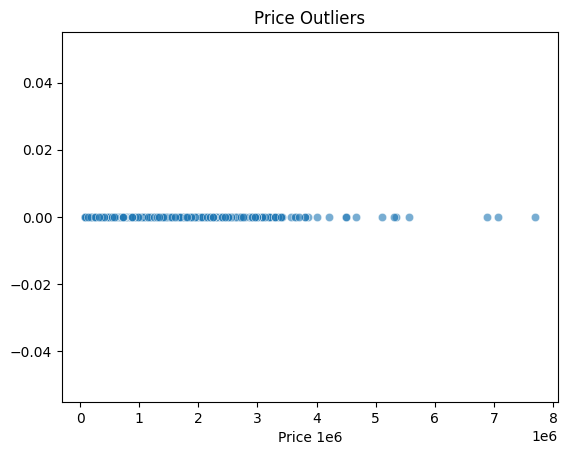

In [ ]:
#housing prices and squarefootage of living area
#this scatterplot is megaphone shaped which tells us it's not the best correlation. but it's also
#the best one we'll see
#sns.scatterplot(x = housing['sqft_living'], y = housing['price'])
plt.scatter(housing['price'], [0] * len(housing), alpha=0.6, edgecolors="w", linewidth=0.5)
plt.title("Price Outliers")
plt.xlabel("Price 1e6")

<Axes: xlabel='sqft_living', ylabel='price'>

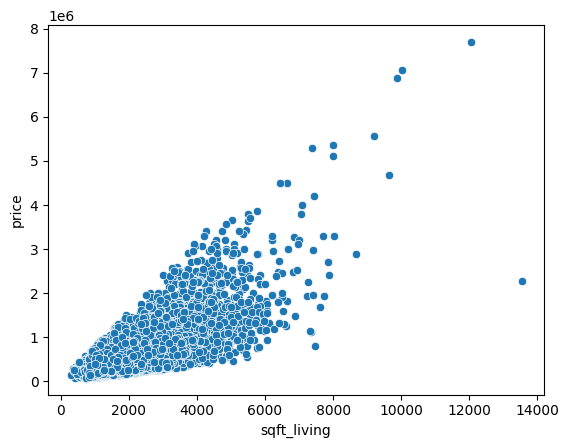

In [ ]:
sns.scatterplot(x = housing['sqft_living'], y = housing['price'])

<Axes: xlabel='bedrooms', ylabel='price'>

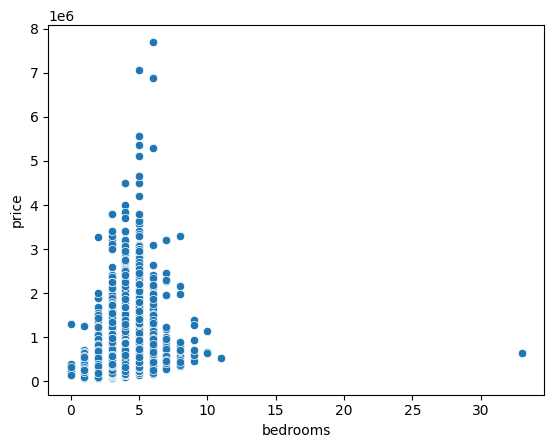

In [ ]:
#bedrooms and price
sns.scatterplot(x = housing['bedrooms'], y = housing['price'])

<Axes: xlabel='lat', ylabel='price'>

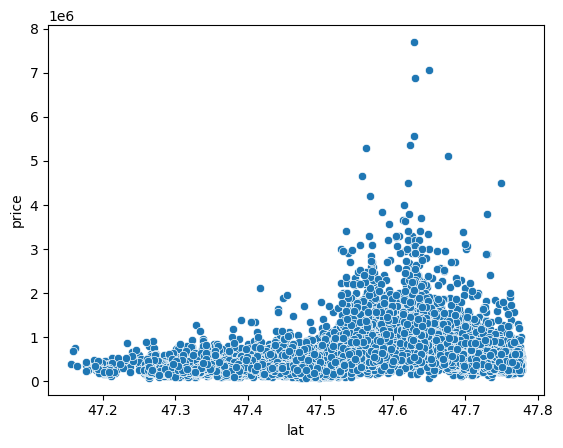

In [ ]:
#latitude and price
sns.scatterplot(x = housing['lat'], y = housing['price'])

<ipython-input-27-89cff64eace3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = dataset.corr()


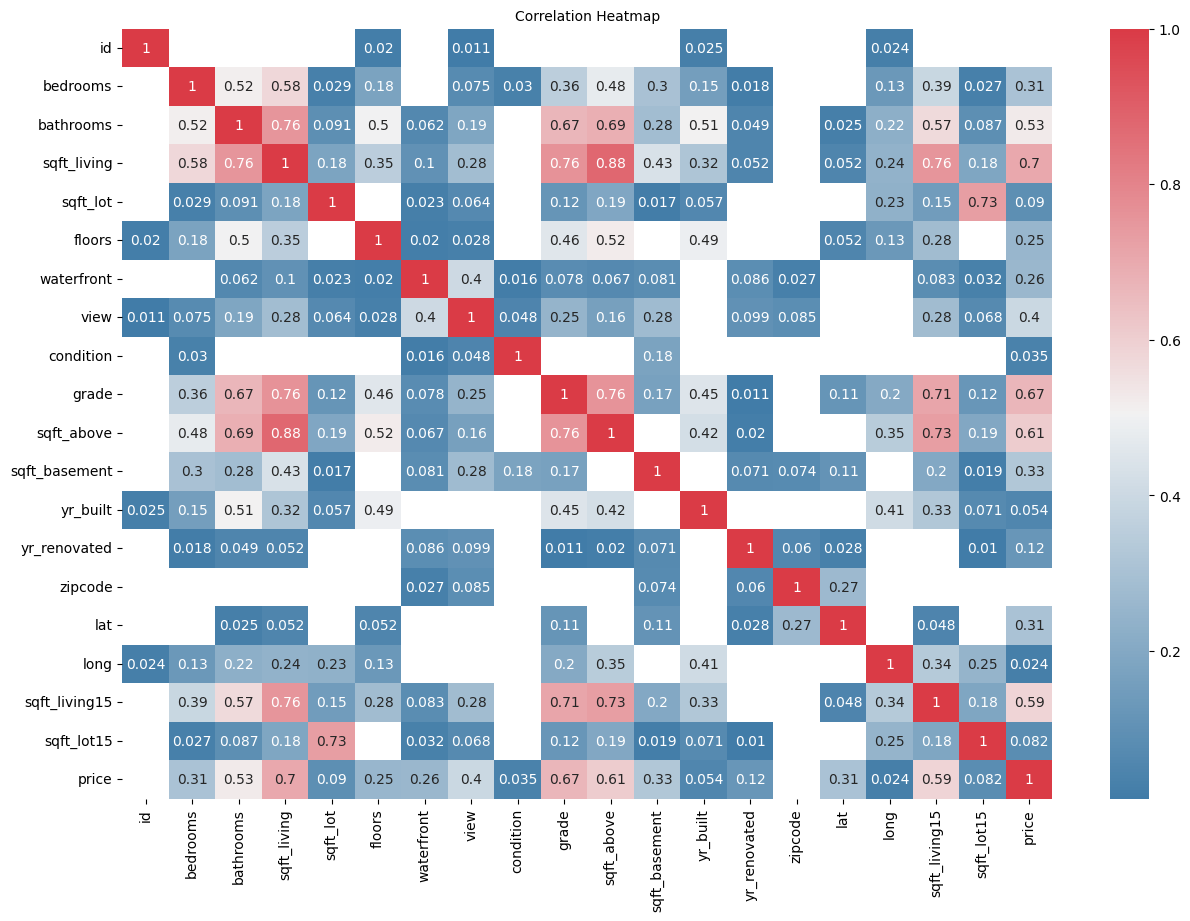

In [ ]:
#Implemented code from
# https://medium.com/shecodeafrica/predicting-house-prices-gradientboostingregressor-algorithm-ec9d381b0ebc
# Implemented code for colors https://seaborn.pydata.org/archive/0.11/generated/seaborn.diverging_palette.html
corrMatrix = dataset.corr()
plt.figure(figsize=(15,10))
colormap=sns.diverging_palette(600,10,as_cmap=True)
sns.heatmap(corrMatrix[corrMatrix > 0.01] , annot=True, cmap=colormap)
plt.title("Correlation Heatmap", fontsize = 10)
plt.show()


In [ ]:
# Identify features
#Checking out the categories and their respective counts in each feature - running it through a for loop
for col in housing.select_dtypes(include='object').columns:
    print(col, "column")
    print("Number of unique:", housing[col].nunique())
    print(housing[col].value_counts(), '\n')
# look at dates it is an object we need to change it before we can use it in gradient.
# what should we do
#normalized?
# just dropping to get examples to work
#dataset.drop(columns=['date'])


date column
Number of unique: 370
20140623T000000    135
20140626T000000    123
20140625T000000    120
20140708T000000    117
20150427T000000    116
                  ... 
20140727T000000      1
20150527T000000      1
20150524T000000      1
20140830T000000      1
20141115T000000      1
Name: date, Length: 370, dtype: int64 



<Axes: title={'center': 'house prices by sqft_above'}, xlabel='sqft_above', ylabel='price'>

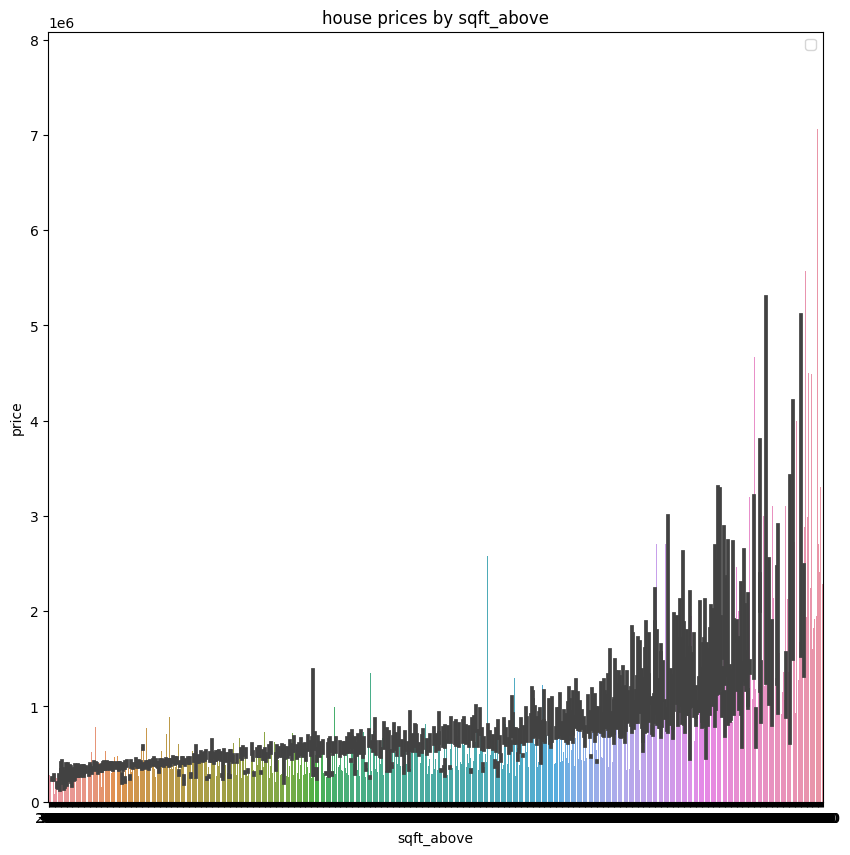

In [ ]:
#Implemented code from
# https://medium.com/shecodeafrica/predicting-house-prices-gradientboostingregressor-algorithm-ec9d381b0ebc
import seaborn as sns
# A barplot is plotted between sqft living and prices to get an overview of how the price changes with sqft.
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,10))
plt.title("house prices by sqft_above")
plt.xlabel('sqft_above')
plt.ylabel('house prices')
plt.legend()
sns.barplot(x='sqft_above',y='price',data=dataset)

# STEP 5 : SPLITTING DATA INTO TRAINING AND TESTING SET

#Examples


## Doesnt work set x and y

In [ ]:
#set X and Y
df = load_wine() # cluster tasks
X = dataset.data
y = dataset.target

AttributeError: ignored

## Binning

This will replace the price column witht he bin indices. The labels=False argument means we want the bin indices instead of the bin ranges. If you want the bin ranges, you can remove this arguement.
- Binning is useful for continuous variables with a large range of values.
- It can handle outliers and turn continuous variables into categorical ones.
- Variables like 'median_income' and 'housing_median_age' in the housing dataset could benefit from binning.
- Understanding the distribution of variables and the impact of binning on model performance is important.


In [ ]:
dataset['price_bin'] = pd.cut(dataset['price'],bins=3, labels=False)

## Training the testing sets


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: ignored

## Gradient Boost Model


In [ ]:
model = XGBRegressor()
model.fit(X_train, y_train)

NameError: ignored

## Linear Regresssion


In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

##Mean Squared Error (MSE)  and R^2
calculate





In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

In [ ]:
X = dataset.drop('target', axis=1)
y = dataset['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### do Linear Regresssion next


In [ ]:
#Then, create and train a Linear Regression model:
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
#Now we can make predictions on the test set and calculate MSE, RMSE, and R²:
# Make predictions

y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

## Empirical Confidence metric


## simple Linear Regression
for examples I reloaded the files to start over.
https://towardsdatascience.com/regression-using-sklearn-on-kc-housing-dataset-1ac80ca3d6d4

PolynomialFeatures
PolynomialFeatures generates a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.

The metrics is imported as the metric module implements functions assessing prediction error for specific purposes.

In KNeighborsRegressor the target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

dataset = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

In [ ]:
dataset = dataset[dataset['price'] < 800000]

# Split data into features and target
X, Y = dataset.drop(columns=['price', 'waterfront', 'yr_renovated', 'sqft_basement', 'sqft_above', 'view', 'condition', 'id', 'bedrooms', 'floors', 'date', 'bathrooms']), dataset['price']

# Split training data and testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

train_data,test_data=train_test_split(dataset,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['sqft_living']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(test_data['sqft_living']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
SLinePred=reg.predict(x_test)
print('linear model')

# Metrics
mae = mean_absolute_error(y_test, SLinePred)
mse = mean_squared_error(y_test, SLinePred)  # Lower is better
rmse = mean_squared_error(y_test, SLinePred, squared=False)
r2 = r2_score(y_test, SLinePred) # Higher is better

print(f"MSE Simple Linear Regression  (Model Ranking):            {mse}")
print(f"MAE Simple Linear Regression  (Error in each prediction): {mae}")
print(f"RMSE Simple Linear Regression  (Average prediction value): {rmse}")
print(f"R^2 Simple Linear Regression  (Overall Accuracy):         {r2}")


NameError: ignored

Works Cited
Works Cited
https://towardsdatascience.com/regression-using-sklearn-on-kc-housing-dataset-1ac80ca3d6d4

https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regularization.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regularization-py

Brother Flores BYUI

https://towardsdatascience.com/decision-tree-and-random-forest-explained-8d20ddabc9dd



https://medium.com/swlh/using-machine-learning-to-predict-subscription-to-bank-term-deposits-for-clients-with-python-aec8a4690807

https://towardsdatascience.com/regression-using-sklearn-on-kc-housing-dataset-1ac80ca3d6d4


## Simple Gradient Boosting Regressor

https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_california_prediction.html#sphx-glr-packages-scikit-learn-auto-examples-plot-california-prediction-py

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE  Simple Gradient Boosting Regressor  (Model Ranking):            26347855741.511204
MAE  Simple Gradient Boosting Regressor  (Error in each prediction): 135452.28961403194
RMSE Simple Gradient Boosting Regressor  (Average prediction value): 162320.225916277
R^2  Simple Gradient Boosting Regressor  (Overall Accuracy):         -0.007810844008570239


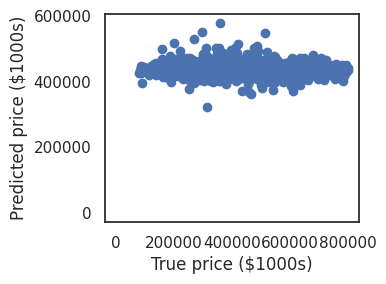

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error , r2_score,confusion_matrix, classification_report, accuracy_score,accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from typing_extensions import dataclass_transform
from scipy.stats import randint
from IPython.display import Image
from sklearn.datasets import load_wine

from math import sqrt

import seaborn as sns #for plotting graphs
import os
os.environ["COLUMNS"] = "74" # output width, in characters
pd.set_option("display.width", 74)
dataset = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
expected = y_test

# Metrics
mae = mean_absolute_error(y_test, predicted)
mse = mean_squared_error(y_test, predicted)  # Lower is better
rmse = mean_squared_error(y_test, predicted, squared=False)
r2 = r2_score(y_test, predicted) # Higher is better

print(f"MSE  Simple Gradient Boosting Regressor  (Model Ranking):            {mse}")
print(f"MAE  Simple Gradient Boosting Regressor  (Error in each prediction): {mae}")
print(f"RMSE Simple Gradient Boosting Regressor  (Average prediction value): {rmse}")
print(f"R^2  Simple Gradient Boosting Regressor  (Overall Accuracy):         {r2}")

plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

## Gradient Boosting Anita Added on 10/16

Next, we will split our dataset to use 90% for training and leave the rest for testing. We will also set the regression model parameters. You can play with these parameters to see how the results change.

n_estimators : the number of boosting stages that will be performed. Later, we will plot deviance against boosting iterations.

max_depth : limits the number of nodes in the tree. The best value depends on the interaction of the input variables.

min_samples_split : the minimum number of samples required to split an internal node.

learning_rate : how much the contribution of each tree will shrink.

loss : loss function to optimize. The least squares function is used in this case however, there are many other options (see GradientBoostingRegressor ).

https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error , r2_score,confusion_matrix, classification_report, accuracy_score,accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from typing_extensions import dataclass_transform
from scipy.stats import randint
from IPython.display import Image
from sklearn.datasets import load_wine

from math import sqrt

import seaborn as sns #for plotting graphs
import os
os.environ["COLUMNS"] = "74" # output width, in characters
pd.set_option("display.width", 74)
dataset = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')


### Divide the dataset into train and test sets using train_test_split module:

In [ ]:
df = load_wine() # cluster tasks
X = df.data
y = df.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

###Then, we create a GradientDescentRegressor object and fit train data:

In [ ]:
clf_gbm = GradientBoostingRegressor()
clf_gbm.fit(X_train, y_train)

GradientBoostingRegressor()

###Then we predict the target values of test set using predict method and measure the accuracy of the model:

In [ ]:
y_pred = clf_gbm.predict(X_test)
expected = y_test

In [ ]:
# accuracy Score
#accuracy_score(y_test, y_pred)

MSE  Gradient Boosting Regressor  (Model Ranking):            0.14457395380967192
MAE  Gradient Boosting Regressor  (Error in each prediction): 0.11837605887467365
RMSE Gradient Boosting Regressor  (Average prediction value): 0.3802288177001737
R^2  Gradient Boosting Regressor  (Overall Accuracy):         0.7521589363262766


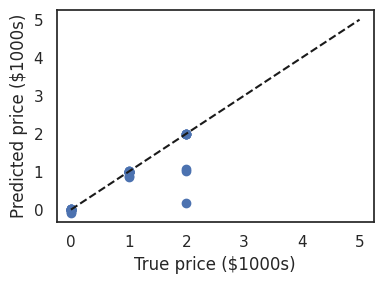

In [ ]:
# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)  # Lower is better
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred) # Higher is better

print(f"MSE  Gradient Boosting Regressor  (Model Ranking):            {mse}")
print(f"MAE  Gradient Boosting Regressor  (Error in each prediction): {mae}")
print(f"RMSE Gradient Boosting Regressor  (Average prediction value): {rmse}")
print(f"R^2  Gradient Boosting Regressor  (Overall Accuracy):         {r2}")

plt.figure(figsize=(4, 3))
plt.scatter(expected, y_pred)
plt.plot([0, 5], [0, 5], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

### Data preprocessing for Gradient Boosting Regression

### Fit regression model

Now we will initiate the gradient boosting regressors and fit it with our training data. Let’s also look and the mean squared error on the test data.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error , r2_score,confusion_matrix, classification_report, accuracy_score,accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from typing_extensions import dataclass_transform
from scipy.stats import randint
from IPython.display import Image
from sklearn.datasets import load_wine

from math import sqrt

import seaborn as sns #for plotting graphs
import os
os.environ["COLUMNS"] = "74" # output width, in characters
pd.set_option("display.width", 74)
dataset = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}


The mean squared error (MSE) on test set: 0.0571
MSE  Fit regression model  (Model Ranking):            0.057131569723436
MAE  Fit regression model  (Error in each prediction): 0.11828058684749124
RMSE Fit regression model  (Average prediction value): 0.23902211136929571
R^2  Fit regression model  (Overall Accuracy):         0.8971631744978152


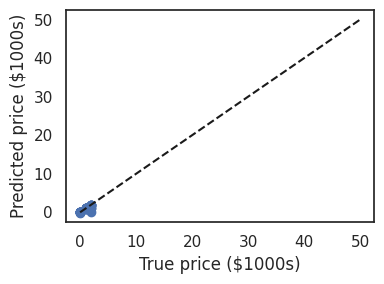

In [ ]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
# Metrics
#mae = mean_absolute_error(y_test,reg.predict(X_test))
mse = mean_squared_error(y_test, reg.predict(X_test))  # Lower is better
rmse = mean_squared_error(y_test, reg.predict(X_test), squared=False)
r2 = r2_score(y_test, reg.predict(X_test)) # Higher is better

print(f"MSE  Fit regression model  (Model Ranking):            {mse}")
print(f"MAE  Fit regression model  (Error in each prediction): {mae}")
print(f"RMSE Fit regression model  (Average prediction value): {rmse}")
print(f"R^2  Fit regression model  (Overall Accuracy):         {r2}")

plt.figure(figsize=(4, 3))
plt.scatter(expected, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

### R-squared testing: 0.496
A scatterplot graph is plotted for x_test, y_test. The data is spread over the graph. Now the line obtained from above is plotted to see how it fits for the data.

Here we are splitting the data in 80:20 ratio, of which train_size is 80% and test_size is 20%. Here x is ‘grade’ and y is ‘price’. We are reshaping the x_train and y_train and the data is fitted. The x_test and y_test are used to predict the accuracy of the model. Here first we are calculating the squared mean error of y_test. The squared mean error for training and test are found. The intercept and coefficient of the line are found.

In [ ]:
train_data,test_data=train_test_split(dataset,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()

x_train=np.array(train_data['grade']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)

reg.fit(x_train,y_train)

x_test=np.array(test_data['grade']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
predFit=reg.predict(x_test)
print('Fit regression model')

#mae = mean_absolute_error(y_test,reg.predict(X_test))
mse = mean_squared_error(y_test, predFit)  # Lower is better
rmse = mean_squared_error(y_test, predFit, squared=False)
r2 = r2_score(y_test, predFit) # Higher is better

print(f"MSE  R-squared testing:Fit regression model  (Model Ranking):            {mse}")
print(f"MAE  R-squared testing:Fit regression model  (Error in each prediction): {mae}")
print(f"RMSE R-squared testing:Fit regression model  (Average prediction value): {rmse}")
print(f"R^2  R-squared testing:Fit regression model  (Overall Accuracy):         {r2}")


print('squared mean error',round(np.sqrt(mse),2))
print('R squared training',round(reg.score(x_train,y_train),3))
print('R squared testing',round(reg.score(x_test,y_test),3))
print('intercept',reg.intercept_)
print('coeeficient',reg.coef_)

Fit regression model
MSE  R-squared testing:Fit regression model  (Model Ranking):            77419497967.10294
MAE  R-squared testing:Fit regression model  (Error in each prediction): 0.11828058684749124
RMSE R-squared testing:Fit regression model  (Average prediction value): 278243.5946560189
R^2  R-squared testing:Fit regression model  (Overall Accuracy):         0.4508869988330947
squared mean error 278243.59
R squared training 0.442
R squared testing 0.451
intercept [-1040638.18271111]
coeeficient [[206205.2560145]]


### Multiple Linear Regression


The boxplot is plotted for ‘grade’, ‘bedrooms’ and ‘bathrooms’ with respective to ‘price’.

<Axes: xlabel='bathrooms', ylabel='price'>

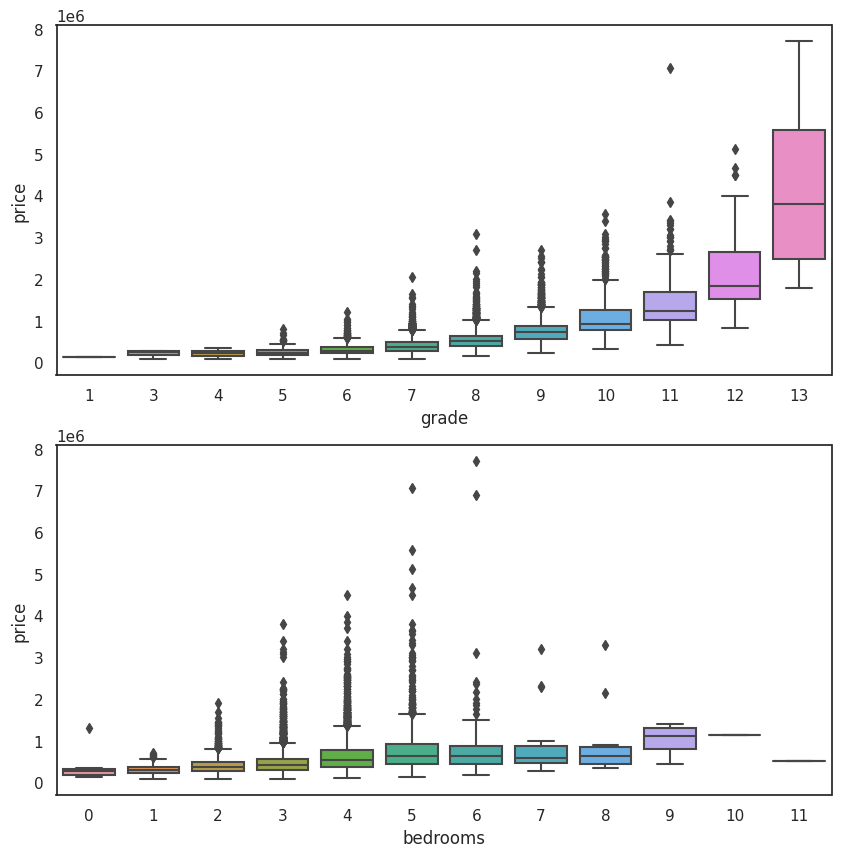

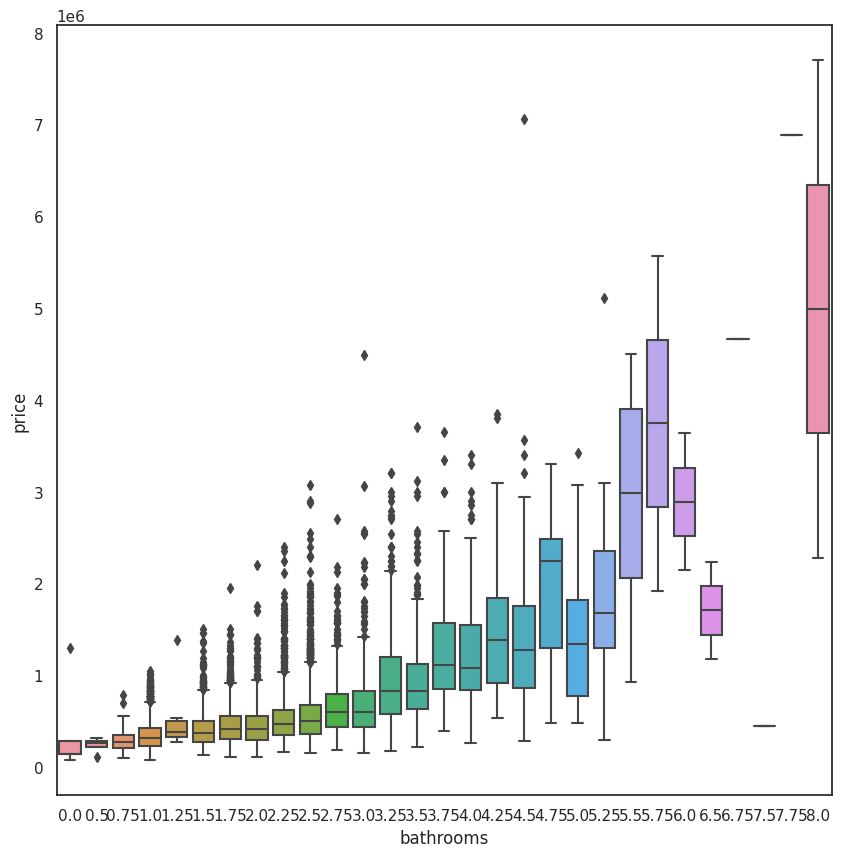

The features we are considering are ‘bedrooms’, ‘grade’, ‘sqft_living’ and ‘sqft_above’. These are considered are one feature namely features1. Now the data is fitted into the model and test_data of features1 are used for prediction. Mean squared error is calculated for y_test. The mean squared error is rounded of upto 2 decimals. R squared error for both training and test is calculated. The intercept of the line is calculated along with coefficient of individual feature.

In [ ]:
features1=['bedrooms','grade','sqft_living','sqft_above']
reg=linear_model.LinearRegression()
reg.fit(train_data[features1],train_data['price'])
pred=reg.predict(test_data[features1])

#mae = mean_absolute_error(y_test,reg.predict(X_test))
mse = mean_squared_error(y_test, pred)  # Lower is better
rmse = mean_squared_error(y_test, pred, squared=False)
r2 = r2_score(y_test, pred) # Higher is better

print('complex_model 1')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('mean squared error(MSE)', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(train_data[features1],train_data['price']),3))
print('R squared training', round(reg.score(test_data[features1],test_data['price']),3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)
print('-----------------------------')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print(f"MSE  Fit regression model  (Model Ranking):            {mse}")
print(f"MAE  Fit regression model  (Error in each prediction): {mae}")
print(f"RMSE Fit regression model  (Average prediction value): {rmse}")
print(f"R^2  Fit regression model  (Overall Accuracy):         {r2}")

complex_model 1
mean squared error(MSE) 252459.82
R squared training 0.551
R squared training 0.548
Intercept:  -488200.268428865
Coefficient: [-4.80585194e+04  9.95449100e+04  2.76217899e+02 -8.24034101e+01]
-----------------------------
MSE  Fit regression model  (Model Ranking):            63735962953.32225
MAE  Fit regression model  (Error in each prediction): 0.11828058684749124
RMSE Fit regression model  (Average prediction value): 252459.8244341508
R^2  Fit regression model  (Overall Accuracy):         0.5479401595392298


R-squared testing: 0.555

The features we are considering are ‘bedrooms’, ’bathrooms’, ’sqft_living’, ’sqft_lot’, ’floors’, ’waterfront’, ’view’, ’grade’, ’sqft_above’, ’sqft_basement’, ’lat’,’sqft_living15'. These are considered are one feature namely features2. Now the data is fitted into the model and test_data of features2 are used for prediction. Mean squared error is calculated for y_test. The mean squared error is rounded of upto 2 decimals. R squared error for both training and test is calculated. The intercept of the line is calculated along with coefficient of individual feature.

In [ ]:
features2 = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','grade','sqft_above','sqft_basement','lat','sqft_living15']
reg= linear_model.LinearRegression()
reg.fit(train_data[features1],train_data['price'])
predFeature2 = reg.predict(test_data[features1])
print('Complex Model_2')
mean_squared_error = metrics.mean_squared_error(y_test, predFeature2)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg.score(train_data[features1], train_data['price']), 3))
print('R-squared (testing) ', round(reg.score(test_data[features1], test_data['price']), 3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)


Complex Model_2
Mean Squared Error (MSE)  252459.82
R-squared (training)  0.551
R-squared (testing)  0.548
Intercept:  -488200.268428865
Coefficient: [-4.80585194e+04  9.95449100e+04  2.76217899e+02 -8.24034101e+01]


### Polynomial Regression


Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E(y |x).

For degree=2, the linear modelis built. The mean squared error is calculated and r squared is found for training and testing.

In [ ]:
polyfeat=PolynomialFeatures(degree=2)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
polypred=poly.predict(xtest_poly)

print('Complex Model_3')
mean_squared_error = metrics.mean_squared_error(test_data['price'], polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

print('-----------------------------')


Complex Model_3
Mean Squared Error (MSE)  266493.56
R-squared (training)  0.62
R-squared (testing)  0.496
-----------------------------



R-squared testing: 0.759


For degree=3, the linear model is built. The mean squared error is calculated and r squared is found for training and testing.

In [ ]:
polyfeat=PolynomialFeatures(degree=3)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
polypred=poly.predict(xtest_poly)

print('complex model_4')
mean_squared_error=metrics.mean_squared_error(test_data['price'],polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

complex model_4
Mean Squared Error (MSE)  321287.72
R-squared (training)  0.631
R-squared (testing)  0.268


R-squared testing: 0.664

Observation
Complex Model_3 gives us R-squared (testing) score of 0.759. From above reports, we can conclude that Polynomial regression for degree=2, is best solution.

For notebook, refer here. I would be pleased to receive feedback or questions on any of the above.

end: https://towardsdatascience.com/regression-using-sklearn-on-kc-housing-dataset-1ac80ca3d6d4

https://medium.com/shecodeafrica/predicting-house-prices-gradientboostingregressor-algorithm-ec9d381b0ebc

In [ ]:
# Identify features
#Checking out the categories and their respective counts in each feature - running it through a for loop
for col in dataset.select_dtypes(include='object').columns:
    print(col, "column")
    print("Number of unique:", dataset[col].nunique())
    print(dataset[col].value_counts(), '\n')

In [ ]:
# just dropping to get examples to work
dataset.drop(columns=['date'])


https://www.kaggle.com/code/sid321axn/house-price-prediction-gboosting-adaboost-etc

# STEP 6: APPLYING MACHINE LEARNING MODEL

# Anita's Attempt
Gradient Boosting Anita
Added on 10/16

The mean squared error (MSE) on test set: 0.0060
0.005975169257262034 mse
0.07729921899516214 rmse
0.9905447871093875 r2
linear model
squared mean error 278243.59
R squared training 0.442
R squared testing 0.451
intercept [-1040638.18271111]
coeeficient [[206205.2560145]]
complex_model 1
mean squared error(MSE) 252459.82
R squared training 0.551
R squared training 0.548
Intercept:  -488200.268428865
Coefficient: [-4.80585194e+04  9.95449100e+04  2.76217899e+02 -8.24034101e+01]
Complex Model_2
Mean Squared Error (MSE)  252459.82
R-squared (training)  0.551
R-squared (testing)  0.548
Intercept:  -488200.268428865
Coefficient: [-4.80585194e+04  9.95449100e+04  2.76217899e+02 -8.24034101e+01]
Complex Model_3
Mean Squared Error (MSE)  266493.56
R-squared (training)  0.62
R-squared (testing)  0.496


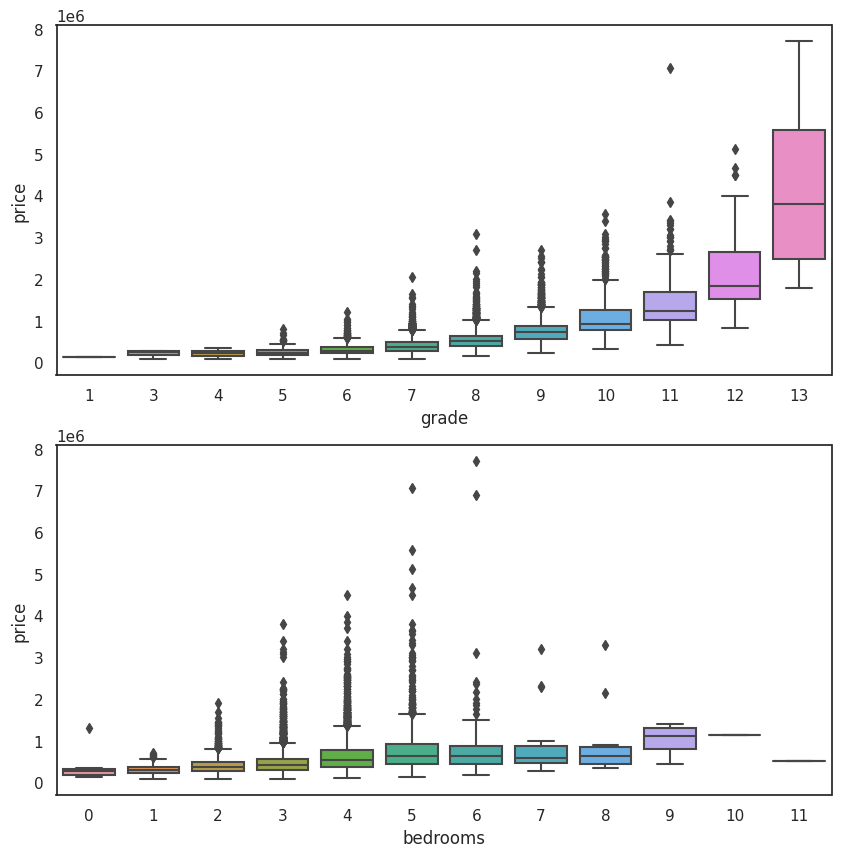

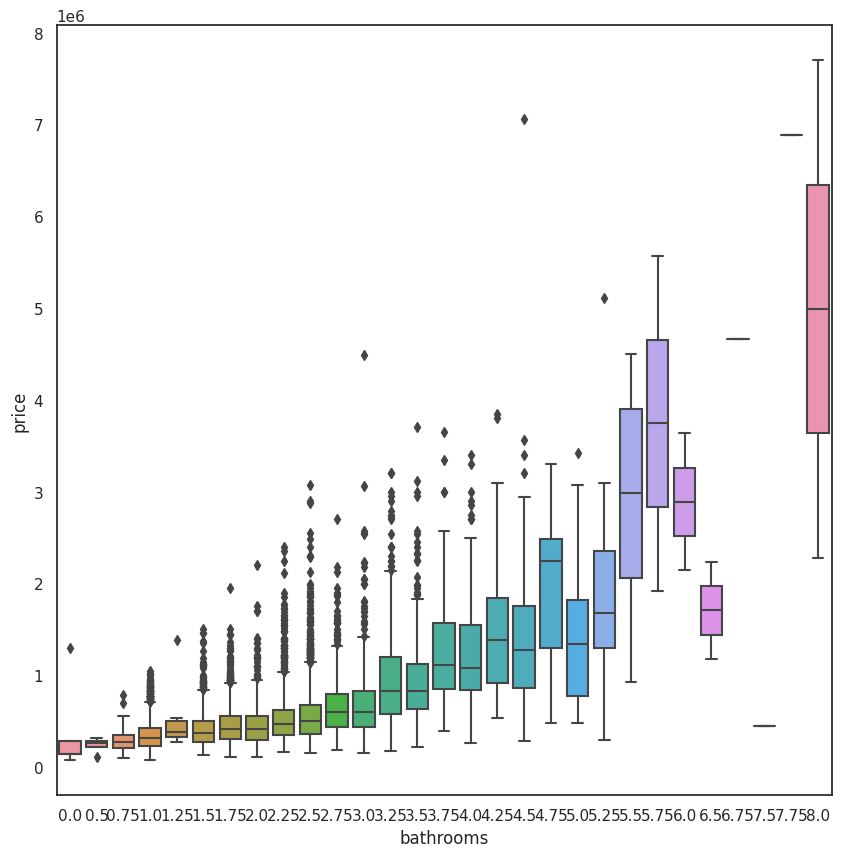

In [ ]:
import numpy as np

df= pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

df = load_wine() # cluster tasks
X = df.data
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=4)
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
clf_gbm = GradientBoostingClassifier()
clf_gbm.fit(X_train, y_train)
y_pred = clf_gbm.predict(X_test)
# accuracy Score
accuracy_score(y_test, y_pred)

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
# Metrics
#mae = mean_absolute_error(y_test,reg.predict(X_test))
mse = mean_squared_error(y_test, reg.predict(X_test))  # Lower is better
rmse = mean_squared_error(y_test, reg.predict(X_test), squared=False)
r2 = r2_score(y_test, reg.predict(X_test)) # Higher is better
#print(mae,'mae')
print(mse ,'mse')
print(rmse,'rmse')
print(r2 ,'r2')

train_data,test_data=train_test_split(dataset,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['grade']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(test_data['grade']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(x_test)
print('linear model')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('squared mean error',round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(x_train,y_train),3))
print('R squared testing',round(reg.score(x_test,y_test),3))
print('intercept',reg.intercept_)
print('coeeficient',reg.coef_)
fig,ax=plt.subplots(2,1,figsize=(10,10))
sns.boxplot(x=train_data['grade'],y=train_data['price'],ax=ax[0])
sns.boxplot(x=train_data['bedrooms'],y=train_data['price'],ax=ax[1])
_ , axes = plt.subplots(1, 1, figsize=(10,10))
sns.boxplot(x=train_data['bathrooms'],y=train_data['price'])
features1=['bedrooms','grade','sqft_living','sqft_above']
reg=linear_model.LinearRegression()
reg.fit(train_data[features1],train_data['price'])
pred=reg.predict(test_data[features1])
print('complex_model 1')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('mean squared error(MSE)', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(train_data[features1],train_data['price']),3))
print('R squared training', round(reg.score(test_data[features1],test_data['price']),3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)
features2 = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','grade','sqft_above','sqft_basement','lat','sqft_living15']
reg= linear_model.LinearRegression()
reg.fit(train_data[features1],train_data['price'])
pred = reg.predict(test_data[features1])
print('Complex Model_2')
mean_squared_error = metrics.mean_squared_error(y_test, pred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg.score(train_data[features1], train_data['price']), 3))
print('R-squared (testing) ', round(reg.score(test_data[features1], test_data['price']), 3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)
polyfeat=PolynomialFeatures(degree=2)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
polypred=poly.predict(xtest_poly)

print('Complex Model_3')
mean_squared_error = metrics.mean_squared_error(test_data['price'], polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

# Prediction Models

## Base Model

MSE  (Model Ranking):            2285839786.918442
MAE  (Error in each prediction): 35873.439989200204
RMSE (Average prediction value): 47810.45687836963
R^2  (Overall Accuracy):         0.7811212112650046


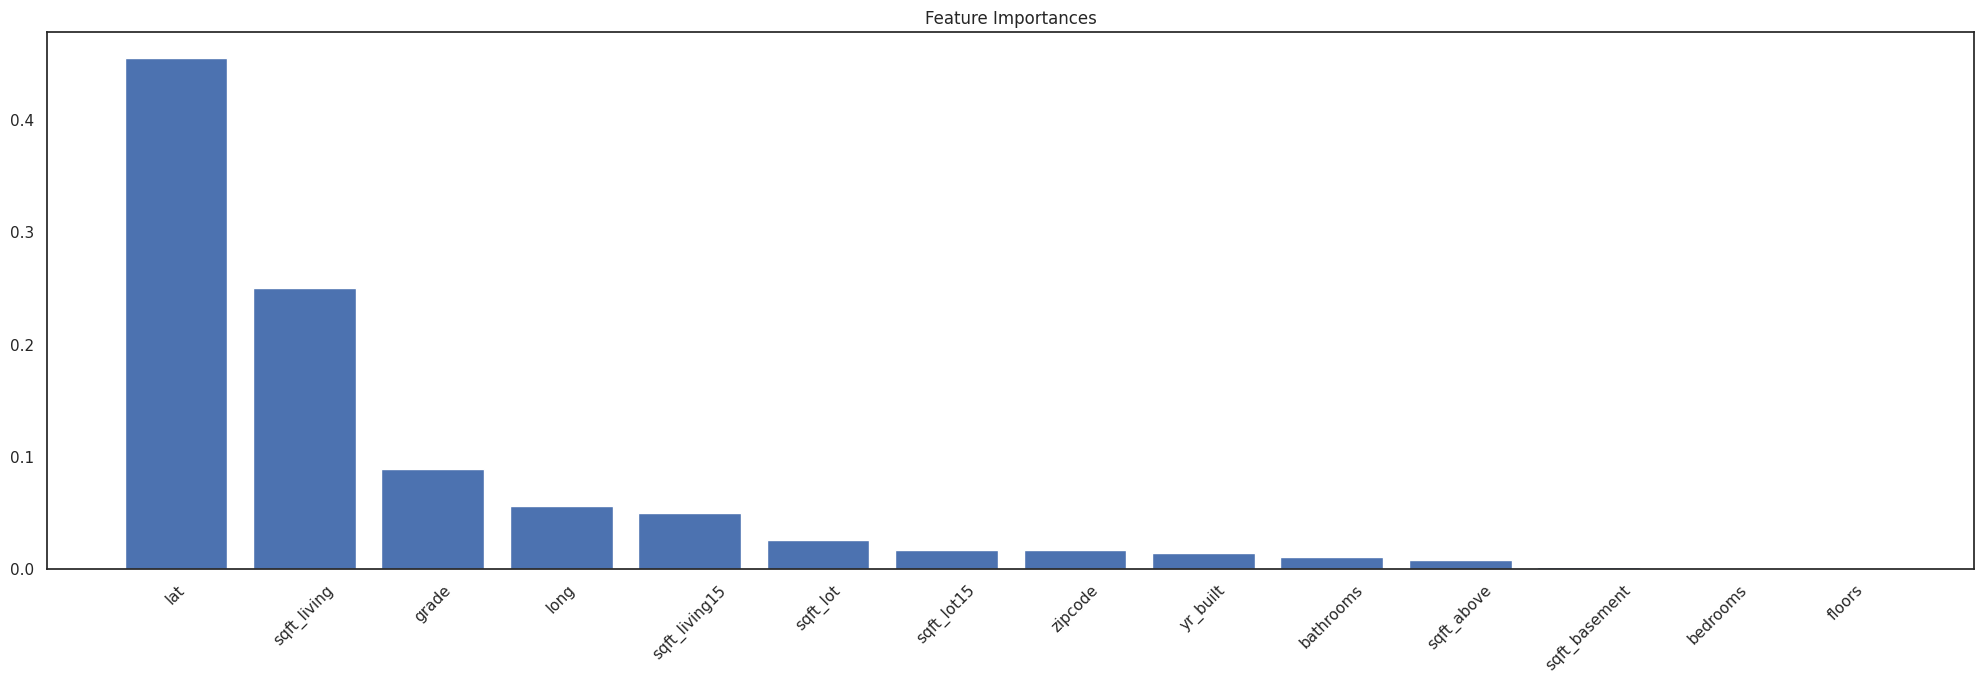

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

housing = housing[housing['price'] < 550000]

# Split data into features and target
X, Y = housing.drop(columns=['price', 'waterfront', 'yr_renovated', 'view', 'condition', 'id', 'date']), housing['price']
# X, Y = housing.drop(columns=['price', 'waterfront', 'lat', 'long', 'yr_renovated', 'sqft_basement', 'sqft_above', 'view', 'condition', 'id', 'bedrooms', 'floors', 'date', 'grade']), housing['price']

# Split training data and testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the model
model = GradientBoostingRegressor(random_state=42, max_depth=8, n_estimators=500, max_leaf_nodes=6)
model.fit(x_train, y_train)

# Have the model make predictions
model_pred = model.predict(x_test)

# Metrics
mae = mean_absolute_error(y_test, model_pred)
mse = mean_squared_error(y_test, model_pred)  # Lower is better
rmse = mean_squared_error(y_test, model_pred, squared=False)
r2 = r2_score(y_test, model_pred) # Higher is better
r2_base=r2

print(f"MSE  (Model Ranking):            {mse}")
print(f"MAE  (Error in each prediction): {mae}")
print(f"RMSE (Average prediction value): {rmse}")
print(f"R^2  (Overall Accuracy):         {r2}")

# Feature Importance
importances = model.feature_importances_
# Get the list of feature names
feature_names = X.columns.tolist()

# Sort feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]
# Plot feature importances
plt.figure(figsize=(20, 7))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(feature_names)[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

## Model Attempt #2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

# Split data into features and target
X, Y = housing.drop(columns=['price', 'waterfront', 'yr_renovated', 'sqft_basement', 'sqft_above', 'view', 'condition', 'id', 'bedrooms', 'floors', 'date', 'lat', 'long']), housing['price']

# Split training data and testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the model
model = GradientBoostingRegressor(random_state=42, max_depth=10, n_estimators=700, max_leaf_nodes=32)
model.fit(x_train, y_train)

# Have the model make predictions
model_pred = model.predict(x_test)

# Metrics
mae = mean_absolute_error(y_test, model_pred)
mse = mean_squared_error(y_test, model_pred)  # Lower is better
rmse = mean_squared_error(y_test, model_pred, squared=False)
r2 = r2_score(y_test, model_pred) # Higher is better

print(f"MSE  (Model Ranking):            {mse}")
print(f"MAE  (Error in each prediction): {mae}")
print(f"RMSE (Average prediction value): {rmse}")
print(f"R^2  (Overall Accuracy):         {r2}")

# Feature Importance
importances = model.feature_importances_
# Get the list of feature names
feature_names = X.columns.tolist()

# Sort feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]
# Plot feature importances
plt.figure(figsize=(20, 7))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(feature_names)[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

# Model Attempt 3

In [ ]:
#https://www.analyticsvidhya.com/blog/2021/09/gradient-boosting-algorithm-a-complete-guide-for-beginners/
#Model Attempt # 3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing

housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

## Feature Engineering

In [ ]:
# create new features total rooms by adding bedrooms and bathrrooms
# housing['total_rooms'] = housing['bedrooms'] + housing['bathrooms']
# made it worse

In [ ]:
housing = housing[housing['price'] < 550000]

# Split data into features and target
X, Y = housing.drop(columns=['price', 'waterfront', 'yr_renovated', 'view', 'condition', 'id', 'date']), housing['price']
# X, Y = housing.drop(columns=['price', 'waterfront', 'lat', 'long', 'yr_renovated', 'sqft_basement', 'sqft_above', 'view', 'condition', 'id', 'bedrooms', 'floors', 'date', 'grade']), housing['price']

# Split training data and testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Gradient Boost

In [ ]:
# Define Gradient Boosting Classifier with hyperparameters
gbr=GradientBoostingRegressor(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )
print("FITTING")
# Fit train data to GBC
gbr.fit(x_train,y_train)
print("DONE FITTING")
# Have the model make predictions
gbr_pred = gbr.predict(x_test)

FITTING
DONE FITTING


## Check Accurracy
Adding feature engineering

In [ ]:
# Metrics
mae = mean_absolute_error(y_test, gbr_pred)
mse = mean_squared_error(y_test, gbr_pred)  # Lower is better
rmse = mean_squared_error(y_test, gbr_pred, squared=False)
r2 = r2_score(y_test, gbr_pred) # Higher is better

print(f"MSE  (Model Ranking):            {mse}")
print(f"MAE  (Error in each prediction): {mae}")
print(f"RMSE (Average prediction value): {rmse}")
print(f"R^2  (Overall Accuracy):         {r2}")
# makes it
# main model
#MSE  (Model Ranking):            24296185245.04811
#MAE  (Error in each prediction): 80678.04453488323
#RMSE (Average prediction value): 155872.33636873515
#R^2  (Overall Accuracy):         0.8389043326582185

MSE  (Model Ranking):            2384103599.3893447
MAE  (Error in each prediction): 36846.56932615153
RMSE (Average prediction value): 48827.28335049314
R^2  (Overall Accuracy):         0.7717120372829955


model attempt 2

MSE  (Model Ranking):            24296185245.04811

MAE  (Error in each prediction): 80678.04453488323

RMSE (Average prediction value): 155872.33636873515

R^2  (Overall Accuracy):         0.8389043326582185

## Add Scaling - made it worse
https://medium.com/mlearning-ai/gradient-boosting-for-regression-from-scratch-bba968c16c57


In [ ]:
from sklearn.preprocessing import StandardScaler
#scaling
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)
#y_train = np.array(y_train).reshape(X_train.shape[0],1)
#y_test = np.array(y_test).reshape(X_test.shape[0],1)
# Have the model make predictions
#gbr_pred_scaler = gbr.predict(X_test)

# Metrics
#mae = mean_absolute_error(y_test, gbr_pred_scaler)
#mse = mean_squared_error(y_test, gbr_pred_scaler)  # Lower is better
#rmse = mean_squared_error(y_test, gbr_pred_scaler, squared=False)
#r2 = r2_score(y_test, gbr_pred_scaler) # Higher is better

#print(f"MSE  (Model Ranking):            {mse}")
#print(f"MAE  (Error in each prediction): {mae}")
#print(f"RMSE (Average prediction value): {rmse}")
#print(f"R^2  (Overall Accuracy):         {r2}")

## Add grid

In [ ]:
#define parameters for exploration for grid

param_grid = {
    "n_estimators":[500,700,900],
    "max_depth": [5,10,15,],
    "max_leaf_nodes": [20,32,50]
}
# different rates to mess with
#'learning_rate':[0.01,0.05, 0.1]
#"n_estimators":[100,500,100],
# create gradient boos regressor
gbr_grid= GradientBoostingRegressor(random_state=42)

In [ ]:
# create grid search Cv
grid_search = GridSearchCV( estimator=gbr_grid, param_grid=param_grid, cv=3, scoring= "neg_mean_squared_error",verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'max_leaf_nodes': [20, 32, 50],
                         'n_estimators': [500, 700, 900]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
# get optimal parameters
best_params = grid_search.best_params_
print(f"Best Parameter: {best_params}")
print("Train Score:", grid_search.best_score_)
print("Test Score:", grid_search.score(x_test, y_test))


Best Parameter: {'max_depth': 5, 'max_leaf_nodes': 20, 'n_estimators': 500}
Train Score: -2705364441.663152
Test Score: -2280621889.2414293


## Grid Model

In [ ]:
# train model getting the optimal parameters
model_grid= GradientBoostingRegressor(**best_params)
model_grid.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5, max_leaf_nodes=20, n_estimators=500)

## Grid Accuracy


In [ ]:
# make predications
model_pred_grid = model_grid.predict(x_test)

#calculate Metrics
mae = mean_absolute_error(y_test, model_pred_grid)
mse = mean_squared_error(y_test, model_pred_grid)  # Lower is better
rmse = mean_squared_error(y_test, model_pred_grid, squared=False)
r2 = r2_score(y_test, model_pred_grid) # Higher is better
r2_Anita= r2

print(f"MSE  (Model Ranking):            {mse}")
print(f"MAE  (Error in each prediction): {mae}")
print(f"RMSE (Average prediction value): {rmse}")
print(f"R^2  (Overall Accuracy):         {r2}")

MSE  (Model Ranking):            2294479962.343728
MAE  (Error in each prediction): 35436.24946696322
RMSE (Average prediction value): 47900.730290296495
R^2  (Overall Accuracy):         0.7802938780711529


model attempt 2

MSE  (Model Ranking):            24296185245.04811

MAE  (Error in each prediction): 80678.04453488323

RMSE (Average prediction value): 155872.33636873515

R^2  (Overall Accuracy):         0.8389043326582185

#Model Attempt #4


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')
housing = housing[housing['bedrooms'] < 12]
housing = housing[housing['sqft_living'] < 8000]
housing = housing[housing['price'] < 800000]
def citycenterdistance(lat,lon):
  point1 = np.array((47.60692523857865, -122.34001240668884))
  point2 = np.array((lat,lon))

  return np.linalg.norm(point1 - point2)

housing['distance'] = housing.apply(lambda x: citycenterdistance(x.lat, x.long), axis=1)

# Split data into features and target
X, Y = housing.drop(columns=['price', 'waterfront', 'yr_renovated', 'sqft_basement', 'sqft_above', 'view', 'condition', 'id', 'bedrooms', 'floors', 'date', 'bathrooms']), housing['price']

# Split training data and testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the model
model_4 = GradientBoostingRegressor(random_state=42, max_depth=8, n_estimators=700, max_leaf_nodes=8)
# model_4 = xgb.XGBRegressor(random_state=42, max_depth=8, n_estimators=700, max_leaves=8)
model_4.fit(x_train, y_train)

# Have the model make predictions
model_pred = model_4.predict(x_test)

# Metrics
mae = mean_absolute_error(y_test, model_pred)
mse = mean_squared_error(y_test, model_pred)  # Lower is better
rmse = mean_squared_error(y_test, model_pred, squared=False)
r2 = r2_score(y_test, model_pred) # Higher is better
r2_best=r2

print(f"MSE  (Model Ranking):            {mse}")
print(f"MAE  (Error in each prediction): {mae}")
print(f"RMSE (Error in each prediction): {rmse}")
print(f"R^2  (Overall Accuracy):         {r2}")

# Feature Importance
importances = model_4.feature_importances_
# Get the list of feature names
feature_names = X.columns.tolist()

# Sort feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]
# Plot feature importances
plt.figure(figsize=(20, 7))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(feature_names)[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

KeyboardInterrupt: ignored

# resubmition for holdout set

In [ ]:
from xgboost import XGBRegressor
#getting rid of any duplicates
housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')
#filtering outliers
housing.drop_duplicates(subset=None, keep='first', inplace=False)
housing = housing[housing['bedrooms'] < 10]
housing = housing[housing['bathrooms'] < 7]
housing = housing[housing['bathrooms'] >= 1]
housing = housing[housing['sqft_basement'] < 3000]
housing = housing[housing['sqft_living'] < 8000]
housing = housing[housing['sqft_living15'] < 5000]
housing = housing[housing['sqft_living15'] > 500]
housing = housing[housing['price'] < 800000]
#creating an average price based off zip code
housing['avg_zip_price'] = housing.groupby('zipcode')['price'].transform('mean')

#creating a distance from city center thingy
def citycenterdistance(lat,lon):
  point1 = np.array((47.60692523857865, -122.34001240668884))
  point2 = np.array((lat,lon))

  return np.linalg.norm(point1 - point2)

housing['distance'] = housing.apply(lambda x: citycenterdistance(x.lat, x.long), axis=1)

# Split features from target
# Split features from target
X = housing.drop(columns=['id','date','price','zipcode', 'sqft_lot15', 'yr_renovated'])
y = housing['price']
# Create taining and test sets
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.30, random_state=41)
# Create the model
# Objective - Loss function for regression problems.
# learning_rate - is the weight that slows the learning of the model.
# n_estimators - the number of trees
model = XGBRegressor(objective ='reg:squarederror',max_depth=7,learning_rate=.01,random_state=3,n_estimators=965)


# Train the model
model.fit(X_train, y_train)

#  Predict using the trained model
predictions = model.predict(X_test)

# Evaluate performance
result = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test,predictions)
print(result,r2)


64960.666230367824 0.8347560983859427


In [ ]:
# Import holdout set
mini_holdout = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test_mini.csv")
mini_holdout.drop_duplicates(subset=None, keep='first', inplace=False)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,930000305,20141110T000000,4,1.75,2120,7680,1.0,0,0,4,7,1060,1060,1950,0,98177,47.7172,-122.361,1530,7680
1,9541600015,20150211T000000,4,2.25,2010,15375,1.0,0,0,4,8,2010,0,1957,0,98005,47.5956,-122.174,1930,15375
2,7338000150,20150129T000000,2,1.00,1070,4200,1.0,0,0,4,6,1070,0,1983,0,98002,47.3336,-122.215,1150,4200
3,6113400046,20140723T000000,4,2.50,1890,15770,2.0,0,0,4,7,1890,0,1968,0,98166,47.4281,-122.343,2410,15256
4,291310170,20140804T000000,3,2.50,1600,2610,2.0,0,0,3,8,1600,0,2005,0,98027,47.5344,-122.068,1445,1288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,8902000267,20150402T000000,4,2.75,2260,7209,1.0,0,3,3,7,1330,930,2002,0,98125,47.7088,-122.302,1790,10860
77,7856550240,20140710T000000,5,2.25,3480,9200,2.0,0,0,3,8,3480,0,1979,0,98006,47.5585,-122.153,3130,9200
78,7923500060,20140922T000000,5,2.75,2580,9242,2.0,0,2,4,8,1720,860,1967,0,98007,47.5943,-122.133,2240,9316
79,8898700880,20150317T000000,2,2.00,1590,8000,1.0,0,0,3,7,910,680,1984,0,98055,47.4590,-122.205,1590,8364


In [ ]:
# Calculate Distance to city center for holdout set
mini_holdout['distance'] = mini_holdout.apply(lambda x: citycenterdistance(x.lat, x.long), axis=1)

In [ ]:
mini_holdout = mini_holdout[mini_holdout['bedrooms'] < 10]
mini_holdout = mini_holdout[mini_holdout['bathrooms'] < 7]
mini_holdout = mini_holdout[mini_holdout['bathrooms'] >= 1]
mini_holdout = mini_holdout[mini_holdout['sqft_basement'] < 3000]
mini_holdout = mini_holdout[mini_holdout['sqft_living'] < 8000]
mini_holdout = mini_holdout[mini_holdout['sqft_living15'] < 5000]
mini_holdout = mini_holdout[mini_holdout['sqft_living15'] > 500]

In [ ]:
# Clean holdout set
mini_holdout = mini_holdout.drop(columns=['id','date'])
mini_holdout = mini_holdout.drop(columns=['zipcode', 'sqft_lot15', 'yr_renovated'])

In [ ]:
mini_holdout

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,distance
0,4,1.75,2120,7680,1.0,0,0,4,7,1060,1060,1950,47.7172,-122.361,1530,0.112254
1,4,2.25,2010,15375,1.0,0,0,4,8,2010,0,1957,47.5956,-122.174,1930,0.166398
2,2,1.00,1070,4200,1.0,0,0,4,6,1070,0,1983,47.3336,-122.215,1150,0.300557
3,4,2.50,1890,15770,2.0,0,0,4,7,1890,0,1968,47.4281,-122.343,2410,0.178850
4,3,2.50,1600,2610,2.0,0,0,3,8,1600,0,2005,47.5344,-122.068,1445,0.281515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,4,2.75,2260,7209,1.0,0,3,3,7,1330,930,2002,47.7088,-122.302,1790,0.108736
77,5,2.25,3480,9200,2.0,0,0,3,8,3480,0,1979,47.5585,-122.153,3130,0.193180
78,5,2.75,2580,9242,2.0,0,2,4,8,1720,860,1967,47.5943,-122.133,2240,0.207397
79,2,2.00,1590,8000,1.0,0,0,3,7,910,680,1984,47.4590,-122.205,1590,0.200275


In [ ]:
# Predict house prices for holdout set
holdout_predictions = model.predict(mini_holdout)
holdout_predictions

ValueError: ignored

In [ ]:
holdout_predictions = pd.DataFrame(holdout_predictions, columns=["price"])
holdout_predictions.to_csv('team1-module3-predictions.csv', index=False)

In [ ]:
# Import holdout house prices answers
answers = "https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test_mini_answers.csv"
answers = pd.read_csv(answers)

In [ ]:
# Evaluate results
result = mean_squared_error(answers, holdout_predictions, squared=False)
r2 = r2_score(y_test,predictions)
print(result,r2)

202366.72943792143 0.832540120425447


# Amandas try

The only things I changed was making the cut off for sqft_living be 8000 (based off where I believe the outliers start) and adding a learning_rate of 0.2 to the model. it made things better.

In [ ]:
#packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
#pre processing

housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')



MSE  (Model Ranking):            20377877132.917145
MAE  (Error in each prediction): 80825.3726968502
RMSE (Average prediction value): 142751.1020374874
R^2  (Overall Accuracy):         0.8346520854957424


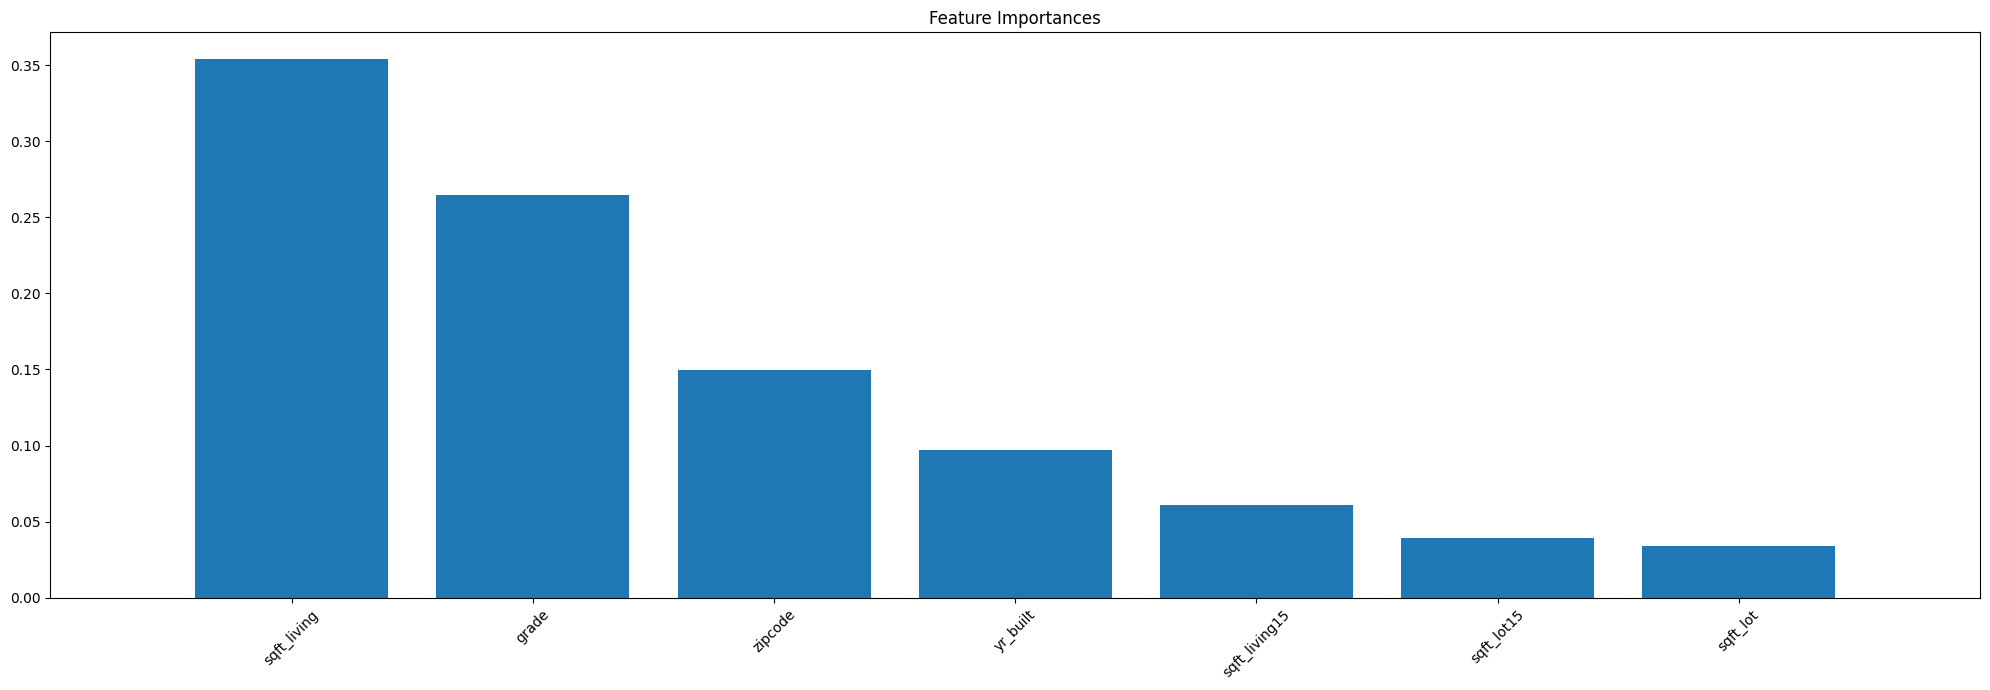

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')
housing = housing[housing['sqft_living'] < 8000]
#housing = housing[housing['grade'] >= 4]
# Split data into features and target
X, Y = housing.drop(columns=['price', 'waterfront', 'yr_renovated', 'sqft_basement', 'sqft_above', 'view', 'condition', 'id', 'bedrooms', 'floors', 'date', 'lat', 'long', 'bathrooms']), housing['price']

# Split training data and testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the model
model = GradientBoostingRegressor(random_state=42, max_depth=10, n_estimators=700, max_leaf_nodes=32, learning_rate = 0.2)
model.fit(x_train, y_train)

# Have the model make predictions
model_pred = model.predict(x_test)

# Metrics
mae = mean_absolute_error(y_test, model_pred)
mse = mean_squared_error(y_test, model_pred)  # Lower is better
rmse = mean_squared_error(y_test, model_pred, squared=False)
r2 = r2_score(y_test, model_pred) # Higher is better
r2_Amanda = r2
print(f"MSE  (Model Ranking):            {mse}")
print(f"MAE  (Error in each prediction): {mae}")
print(f"RMSE (Average prediction value): {rmse}")
print(f"R^2  (Overall Accuracy):         {r2}")

# Feature Importance
importances = model.feature_importances_
# Get the list of feature names
feature_names = X.columns.tolist()

# Sort feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]
# Plot feature importances
plt.figure(figsize=(20, 7))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(feature_names)[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

#Holdout DataSet


In [ ]:
#loading in the holdout set and making the necessary changes to run the model.
#we are using model attempt 4
holdout= pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test.csv')
holdout.info()
holdout_2 = housing.drop(columns=['price','waterfront', 'yr_renovated', 'sqft_basement', 'sqft_above', 'view', 'condition', 'id', 'bedrooms', 'floors', 'date', 'bathrooms'])
holdout_predictions = model_4.predict(holdout_2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1613 entries, 0 to 1612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1613 non-null   int64  
 1   date           1613 non-null   object 
 2   bedrooms       1613 non-null   int64  
 3   bathrooms      1613 non-null   float64
 4   sqft_living    1613 non-null   int64  
 5   sqft_lot       1613 non-null   int64  
 6   floors         1613 non-null   float64
 7   waterfront     1613 non-null   int64  
 8   view           1613 non-null   int64  
 9   condition      1613 non-null   int64  
 10  grade          1613 non-null   int64  
 11  sqft_above     1613 non-null   int64  
 12  sqft_basement  1613 non-null   int64  
 13  yr_built       1613 non-null   int64  
 14  yr_renovated   1613 non-null   int64  
 15  zipcode        1613 non-null   int64  
 16  lat            1613 non-null   float64
 17  long           1613 non-null   float64
 18  sqft_liv

In [ ]:
holdout_predictions = pd.DataFrame(holdout_predictions, columns=["price"])
holdout_predictions.to_csv('team1-module3-predictions.csv', index=False)

# Mini DataSet

## Save file


In [ ]:
import pickle
from pathlib import Path
# loads from a string
s = pickle.dumps(model)
clf2 = pickle.loads(s)

filepath = Path('out.csv')
filepath.parent.mkdir(exist_ok=True)

predict = clf2.predict(mini_encoded)
df = pd.DataFrame(predict, columns=["prices"])

df.to_csv(filepath, index=False)
with open('/content/model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
predictions = loaded_model.predict(mini_encoded)
df = pd.DataFrame(predictions, columns=["prices"])

df.to_csv(filepath, index=False)

#model_pred_holdout = pd.DataFrame(model_pred_holdout)
# no y feature column to let us know if the predictions are correct or not in the holdout set
#mini_holdout_ground_truth = mini[?]
#model_pred_holdout.to_csv('model_pred_holdout.csv', index=False)
#model_pred_holdout

# STEP 7 : ANALYZING TRAINING TIME EACH MODEL HAS TAKEN

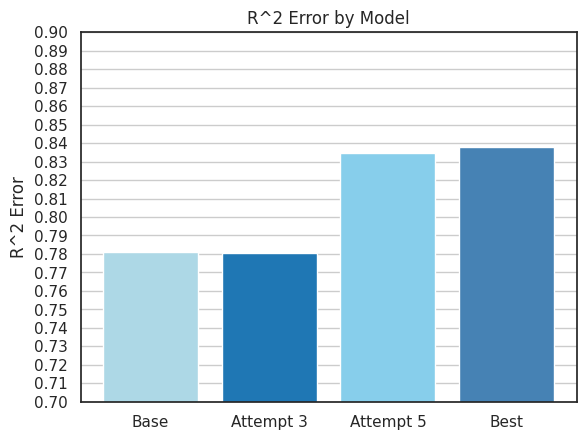

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

Models = ['Base', 'Attempt 3', 'Attempt 5', 'Best']
counts = [r2_base, r2_Anita, r2_Amanda, r2_best]
bar_labels = ['red', 'blue', '_red', 'green']
bar_colors = ['lightblue', 'tab:blue', 'skyblue', 'steelblue']

ax.bar(Models, counts, label=bar_labels, color=bar_colors)
ax.set_ylim([0.725,0.86])
ax.set_yticks(np.arange(0.7,0.9,0.01))
ax.grid(axis='y')
ax.set_ylabel('R^2 Error')
ax.set_title('R^2 Error by Model')


plt.show()

# Correction 1 attempt


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20000 non-null  int64  
 1   date           20000 non-null  object 
 2   bedrooms       20000 non-null  int64  
 3   bathrooms      20000 non-null  float64
 4   sqft_living    20000 non-null  int64  
 5   sqft_lot       20000 non-null  int64  
 6   floors         20000 non-null  float64
 7   waterfront     20000 non-null  int64  
 8   view           20000 non-null  int64  
 9   condition      20000 non-null  int64  
 10  grade          20000 non-null  int64  
 11  sqft_above     20000 non-null  int64  
 12  sqft_basement  20000 non-null  int64  
 13  yr_built       20000 non-null  int64  
 14  yr_renovated   20000 non-null  int64  
 15  zipcode        20000 non-null  int64  
 16  lat            20000 non-null  float64
 17  long           20000 non-null  float64
 18  sqft_l

In [ ]:
print(housing['sqft_living'].value_counts())

1400    127
1300    126
1440    124
1660    122
1820    121
       ... 
9890      1
5170      1
5844      1
2906      1
380       1
Name: sqft_living, Length: 995, dtype: int64


In [ ]:
# feature engineeering
housing = housing[housing['price'] < 500000]
housing = housing[housing['sqft_living'] < 7000]
housing = housing[housing['bathrooms']>.5 || < 6]


# Brother Flores code
# added a new column
# Create a function to calculate the distance between city center and house.
def citycenterdistance(lat,lon):

  # Settle City Center Lat and Lon
  point1 = np.array((47.60692523857865, -122.34001240668884))
  point2 = np.array((lat, lon))

  # calculating Euclidean distance using linalg.norm()
  return np.linalg.norm(point1 - point2)
  # Calculate Distance to city center
# lambda function is an anonymous function used to execute simple expressions
# Syntax - lambda [argument variable] : [expression]
housing['distance'] = housing.apply(lambda x: citycenterdistance(x.lat, x.long), axis=1)
housing.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11511 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             11511 non-null  int64  
 1   date           11511 non-null  object 
 2   bedrooms       11511 non-null  int64  
 3   bathrooms      11511 non-null  float64
 4   sqft_living    11511 non-null  int64  
 5   sqft_lot       11511 non-null  int64  
 6   floors         11511 non-null  float64
 7   waterfront     11511 non-null  int64  
 8   view           11511 non-null  int64  
 9   condition      11511 non-null  int64  
 10  grade          11511 non-null  int64  
 11  sqft_above     11511 non-null  int64  
 12  sqft_basement  11511 non-null  int64  
 13  yr_built       11511 non-null  int64  
 14  yr_renovated   11511 non-null  int64  
 15  zipcode        11511 non-null  int64  
 16  lat            11511 non-null  float64
 17  long           11511 non-null  float64
 18  sqft_l

In [ ]:
# Split data into features and target - altered per brother Flores code
X = housing.drop(columns=['id','date','price','zipcode', 'yr_renovated', 'sqft_lot15'])
y = housing['price']
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17236 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       17236 non-null  int64  
 1   bathrooms      17236 non-null  float64
 2   sqft_living    17236 non-null  int64  
 3   sqft_lot       17236 non-null  int64  
 4   floors         17236 non-null  float64
 5   waterfront     17236 non-null  int64  
 6   view           17236 non-null  int64  
 7   condition      17236 non-null  int64  
 8   grade          17236 non-null  int64  
 9   sqft_above     17236 non-null  int64  
 10  sqft_basement  17236 non-null  int64  
 11  yr_built       17236 non-null  int64  
 12  lat            17236 non-null  float64
 13  long           17236 non-null  float64
 14  sqft_living15  17236 non-null  int64  
 15  distance       17236 non-null  float64
dtypes: float64(5), int64(11)
memory usage: 2.2 MB


In [ ]:
from xgboost.core import Objective
# Split training data and testing data change sizing to .30 and changed the random state
X_test,X_train,y_test,y_train,  = train_test_split(X, y, test_size=0.30, random_state=41)

from xgboost import XGBRegressor

# Create the model
# Objective - Loss function for regression problems.
# learning_rate - is the weight that slows the learning of the model.
# n_estimators - the number of trees
# reg sq
model_5 = XGBRegressor(objective='reg:squarederror',max_depth=7,learning_rate=.01,randome_state=3, n_estimators=965)

# Train the model
model_5.fit(X_train, y_train)

# Have the model make predictions
# teacher uses
#predictions = model.predict(X_test)
model_5_pred = model_5.predict(X_test)

#evaluate performance
result = mean_squared_error(y_test, model_5_pred, squared=False)
r2 = r2_score(y_test, model_5_pred)
print(result, r2)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [23:14:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "randome_state" } are not used.

  warnings.warn(smsg, UserWarning)


65437.90224306783 0.8344889040725618


[0.00499385 0.01109043 0.22125381 0.02345569 0.00809653 0.03202857
 0.04843569 0.02450828 0.19168879 0.01788143 0.00952447 0.01932969
 0.28551635 0.03285743 0.04269508 0.0266439 ] ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15', 'distance']


<Axes: xlabel='importance', ylabel='feature'>

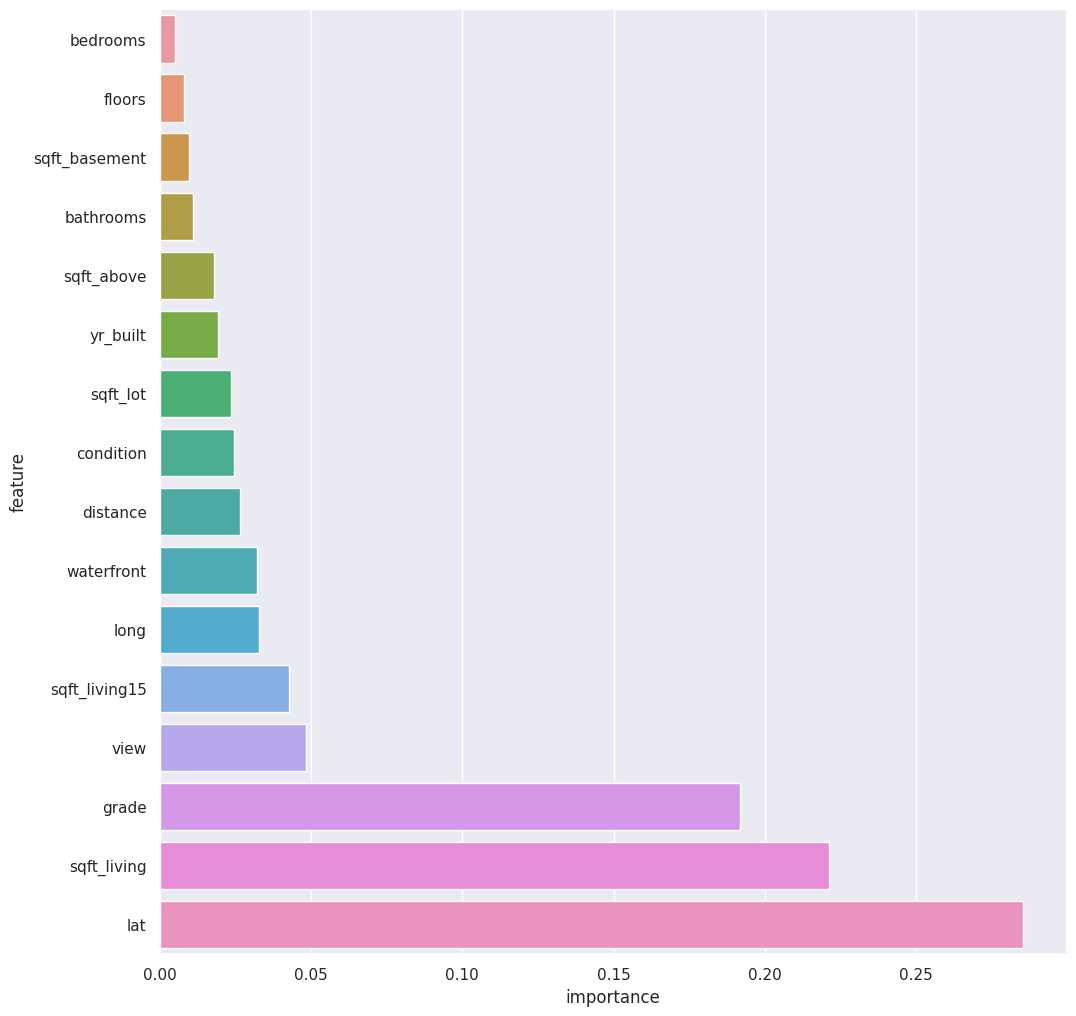

In [ ]:
import seaborn as sns
importance = model_5.feature_importances_
df = pd.DataFrame(list(zip(importance, X.columns.to_list())),columns =['importance', 'feature'])
print(importance,X.columns.to_list())
df.head()
df = df.sort_values(by='importance')
sns.set(rc={'figure.figsize':(11.7,12.27)})
sns.barplot(data=df,x='importance',y='feature')


# Holdout Correction

In [ ]:
# Import holdout set
holdout_3 = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test.csv")

In [ ]:
# feature engineeering
holdout_3['distance'] = holdout_3.apply(lambda x: citycenterdistance(x.lat, x.long), axis=1)
holdout_3= holdout_3.drop(columns=['id','date'])
holdout_3= holdout_3.drop(columns= ['zipcode', 'yr_renovated', 'sqft_lot15'])

In [ ]:
# Predict house prices for holdout set
holdout_prediction = model_5.predict(holdout_3)

In [ ]:
holdout_prediction = pd.DataFrame(holdout_prediction, columns=["price"])
holdout_prediction.to_csv('team1-module3-prediction.csv', index=False)

#evaluate performance
result = mean_squared_error(y_test, model_5_pred, squared=False)
r2 = r2_score(y_test, model_5_pred)
print(result, r2)

65437.90224306783 0.8344889040725618


# Correction Mini DataSet

In [ ]:
# Import holdout set
mini_1  = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test_mini.csv")

In [ ]:
# feature engineeering
mini_1['distance'] = mini_1.apply(lambda x: citycenterdistance(x.lat, x.long), axis=1)
mini_1= mini_1.drop(columns=['id','date'])
mini_1= mini_1.drop(columns= ['zipcode', 'yr_renovated', 'sqft_lot15'])

In [ ]:
# Predict house prices for holdout set
mini_1_prediction = model_5.predict(mini_1)

In [ ]:
mini_1_prediction = pd.DataFrame(holdout_prediction, columns=["price"])
mini_1_prediction.to_csv('team1-mini3-prediction.csv', index=False)

#evaluate performance
result = mean_squared_error(y_test, model_5_pred, squared=False)
r2 = r2_score(y_test, model_5_pred)
print(result, r2)

65437.90224306783 0.8344889040725618
